In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [3]:
file_name = 'engin.csv'  # Update this with your dataset path if necessary
data = pd.read_csv(file_name)

In [4]:
print("Dataset Dimensions:", data.shape)
print("Dataset Info:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())

Dataset Dimensions: (403, 18)
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  403 non-null    int64  
 1   male      403 non-null    int64  
 2   educ      403 non-null    int64  
 3   wage      403 non-null    int64  
 4   swage     403 non-null    int64  
 5   exper     403 non-null    int64  
 6   pexper    403 non-null    int64  
 7   lwage     403 non-null    float64
 8   expersq   403 non-null    int64  
 9   highgrad  403 non-null    int64  
 10  college   403 non-null    int64  
 11  grad      403 non-null    int64  
 12  polytech  403 non-null    int64  
 13  highdrop  403 non-null    int64  
 14  lswage    403 non-null    float64
 15  pexpersq  403 non-null    int64  
 16  mleeduc   403 non-null    int64  
 17  mleeduc0  403 non-null    int64  
dtypes: float64(2), int64(16)
memory usage: 56.8 KB
None

Summary Stati

# Data Handling

## Checking for missing values

In [5]:
print("\nMissing Values:")
print(data.isnull().sum())



Missing Values:
rownames    0
male        0
educ        0
wage        0
swage       0
exper       0
pexper      0
lwage       0
expersq     0
highgrad    0
college     0
grad        0
polytech    0
highdrop    0
lswage      0
pexpersq    0
mleeduc     0
mleeduc0    0
dtype: int64


# Checking for duplicates

In [6]:
print("\nNumber of Duplicates:", data.duplicated().sum())


Number of Duplicates: 0


# Data Cleaning

In [7]:
data = data.drop_duplicates()
data = data.fillna(data.mean())

data.columns = [col.strip().lower().replace(" ", "_") for col in data.columns]

print("\nCleaned Data Info:")
print(data.info())


Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  403 non-null    int64  
 1   male      403 non-null    int64  
 2   educ      403 non-null    int64  
 3   wage      403 non-null    int64  
 4   swage     403 non-null    int64  
 5   exper     403 non-null    int64  
 6   pexper    403 non-null    int64  
 7   lwage     403 non-null    float64
 8   expersq   403 non-null    int64  
 9   highgrad  403 non-null    int64  
 10  college   403 non-null    int64  
 11  grad      403 non-null    int64  
 12  polytech  403 non-null    int64  
 13  highdrop  403 non-null    int64  
 14  lswage    403 non-null    float64
 15  pexpersq  403 non-null    int64  
 16  mleeduc   403 non-null    int64  
 17  mleeduc0  403 non-null    int64  
dtypes: float64(2), int64(16)
memory usage: 56.8 KB
None


# Univariate Analysis

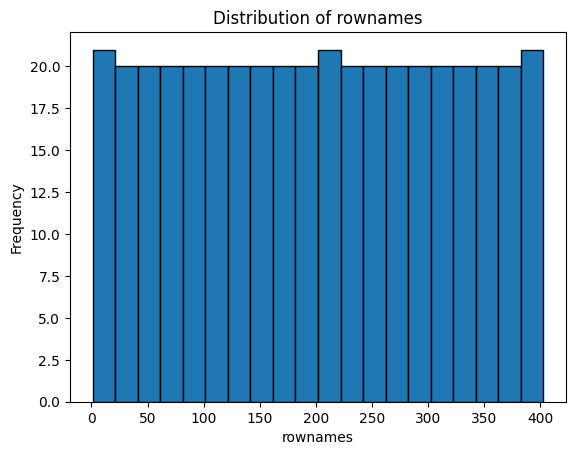

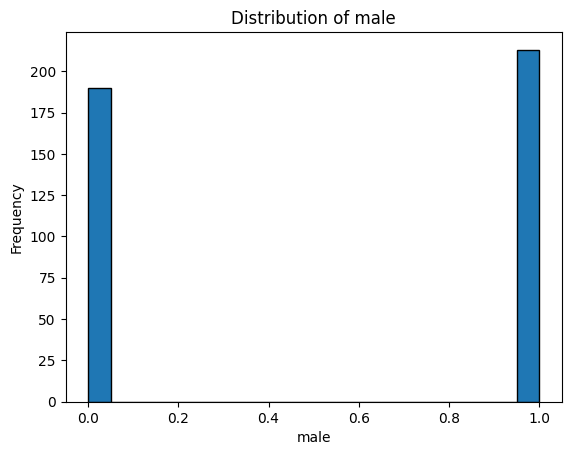

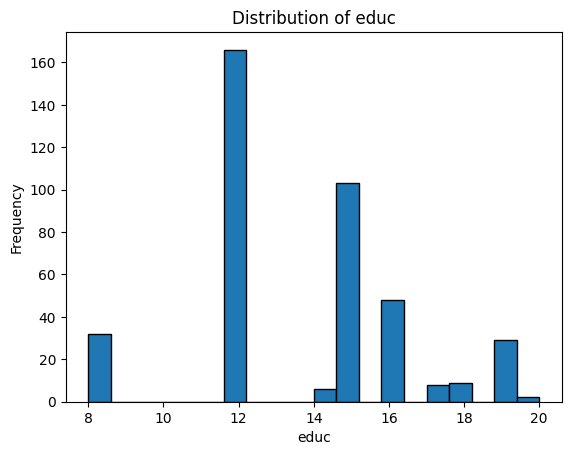

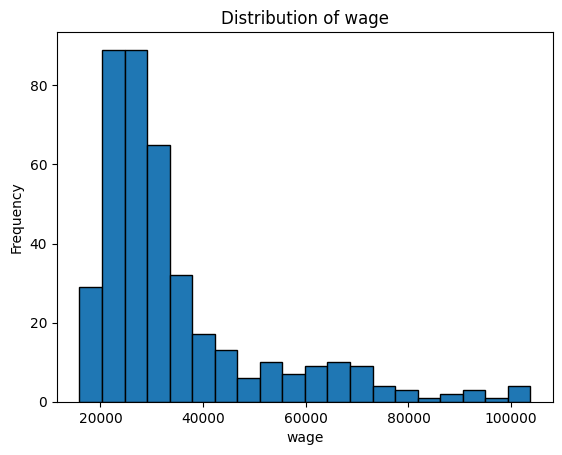

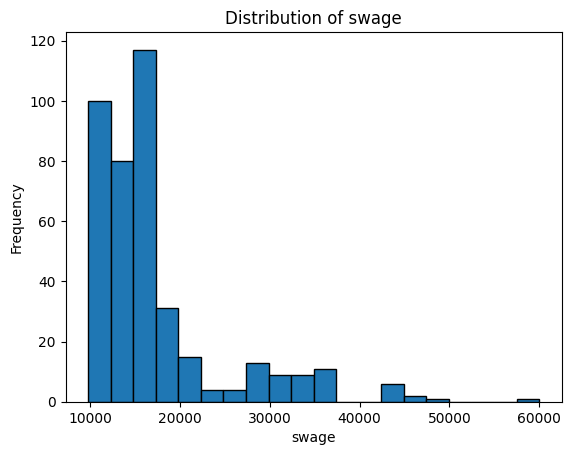

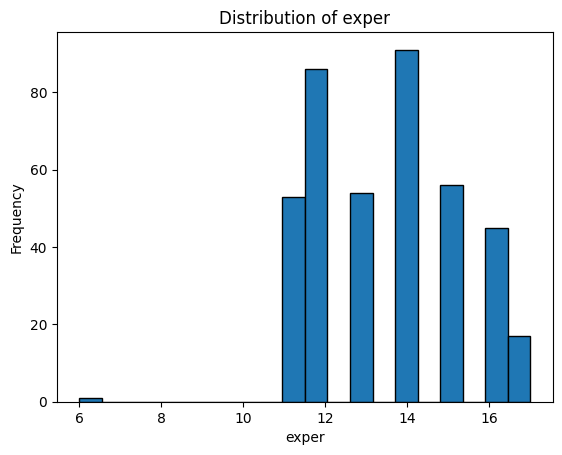

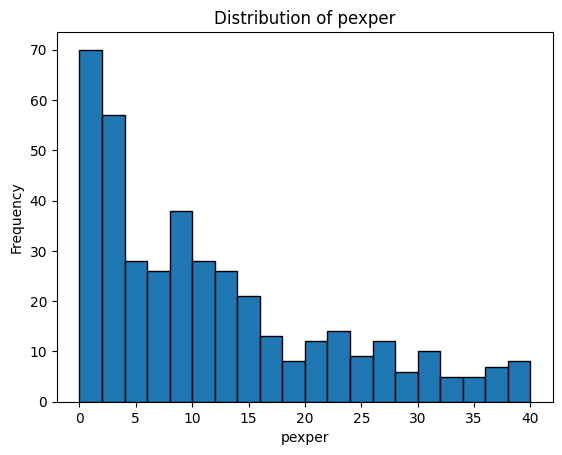

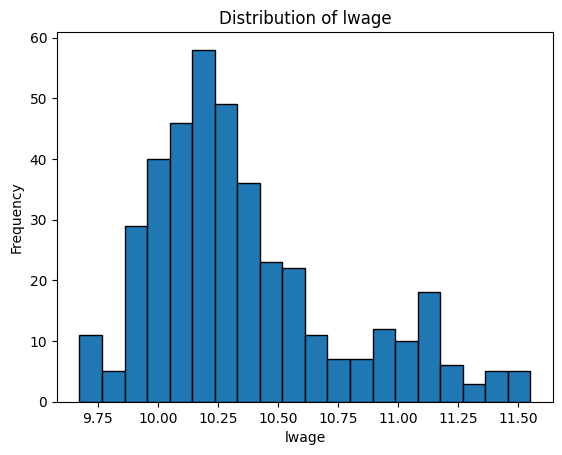

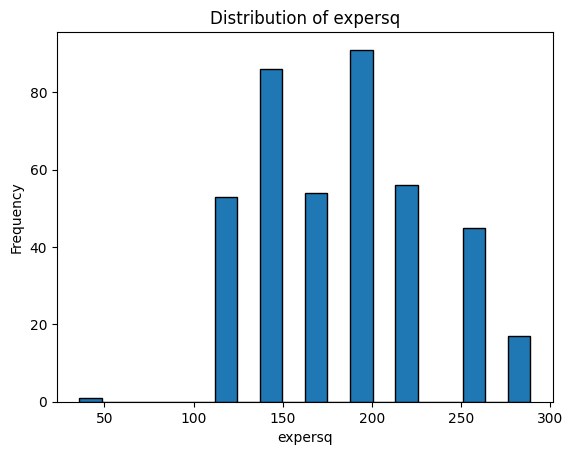

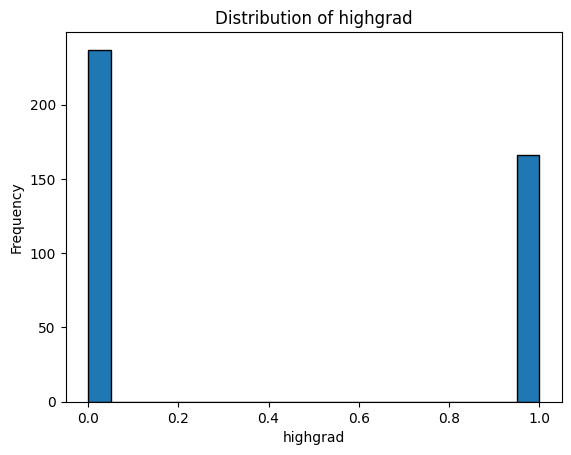

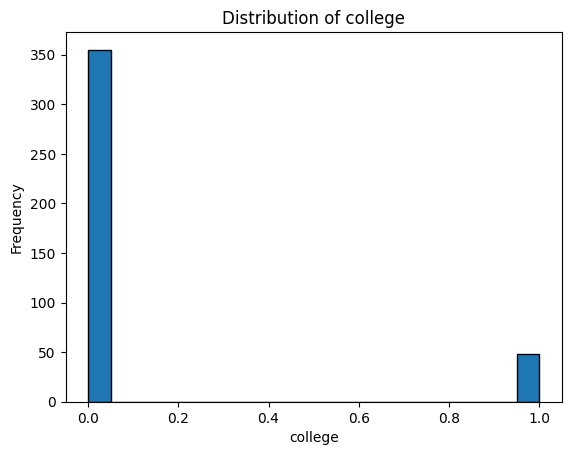

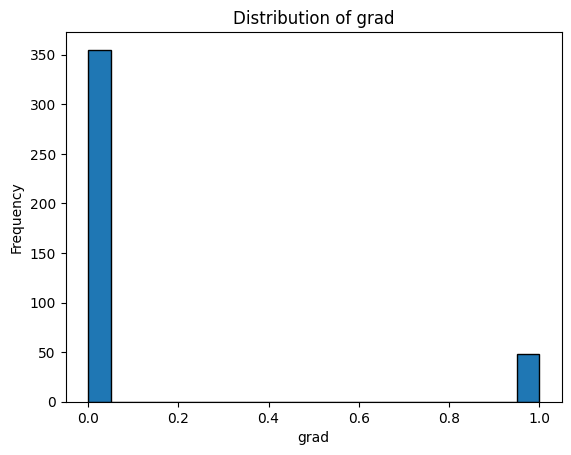

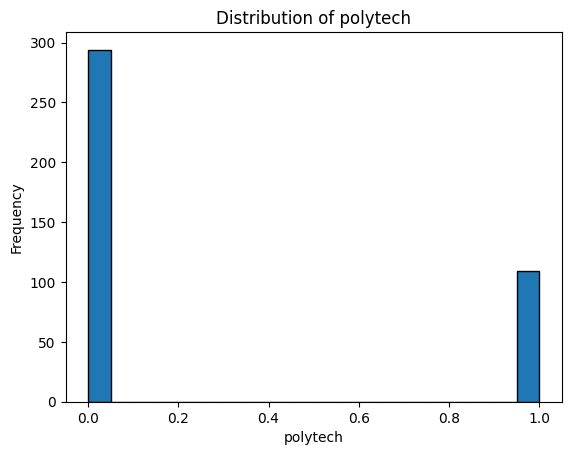

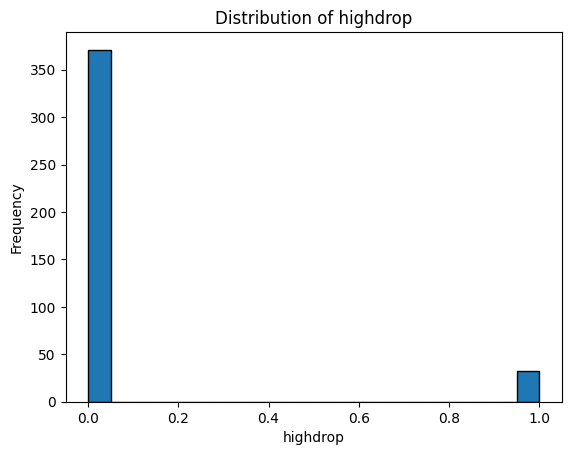

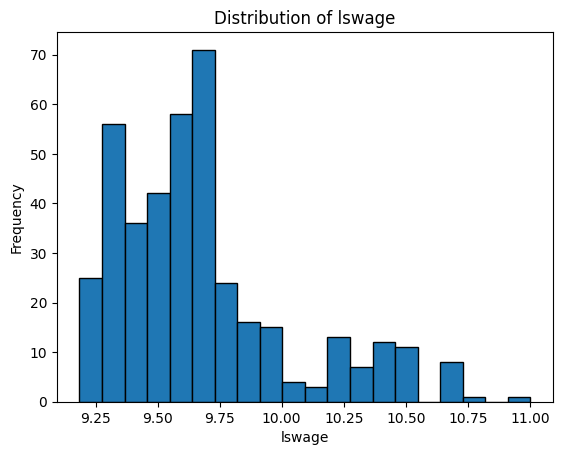

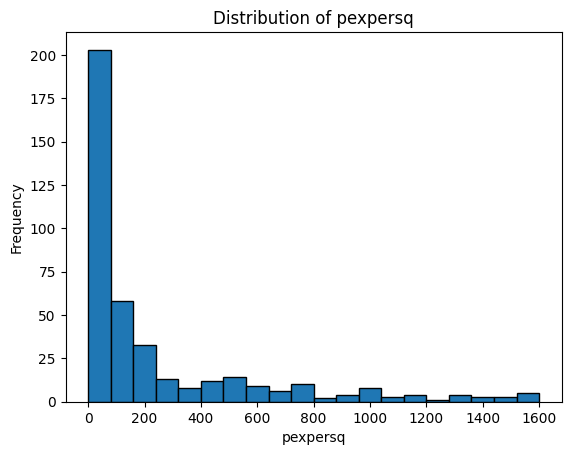

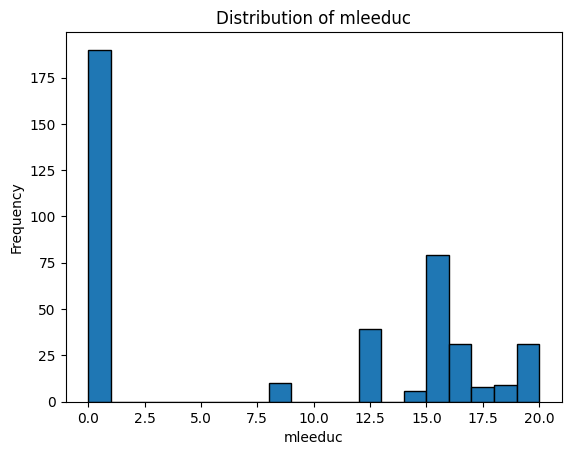

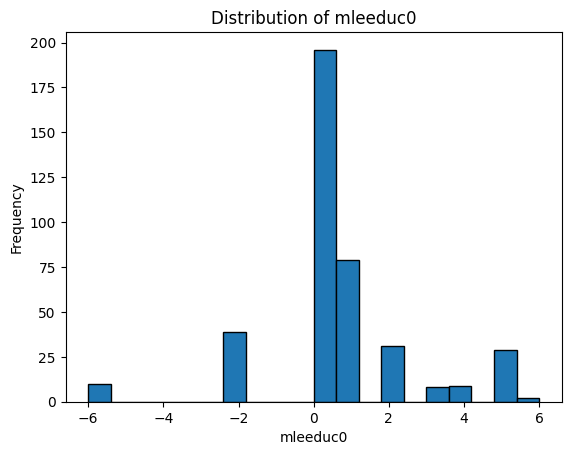

In [8]:

for column in data.select_dtypes(include='number').columns:
    plt.figure()
    plt.hist(data[column], bins=20, edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Bivariate Analysis

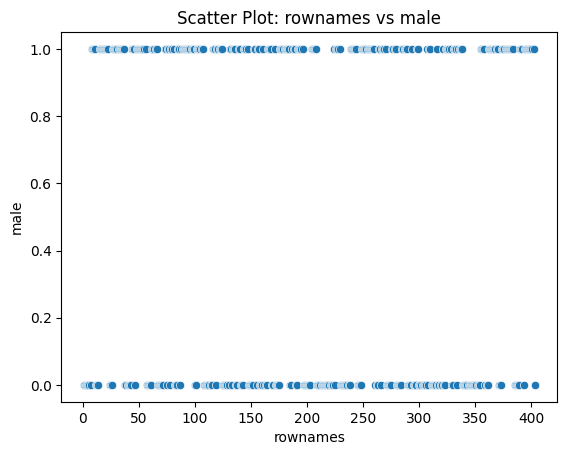

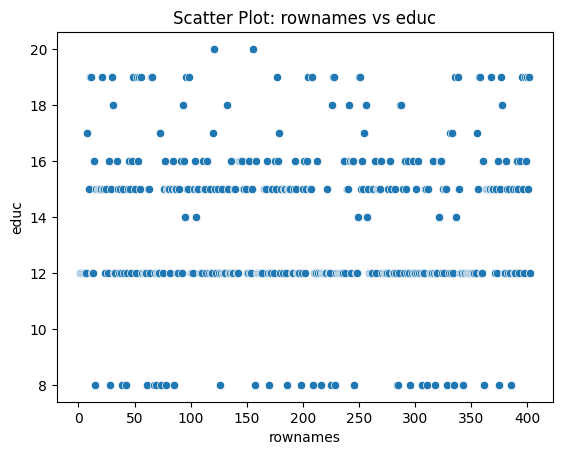

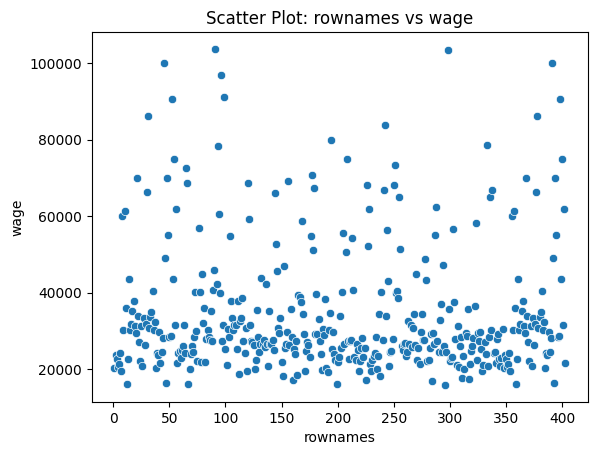

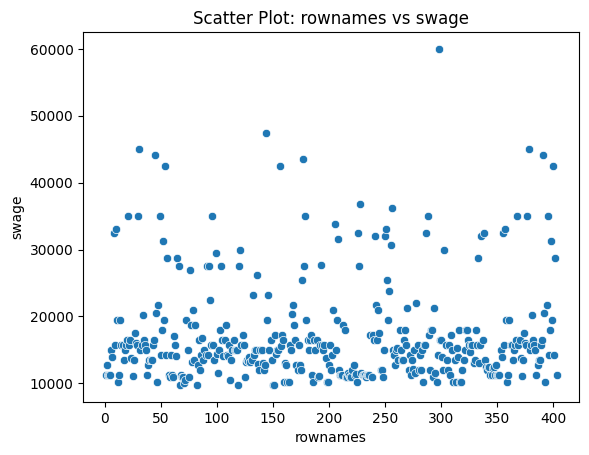

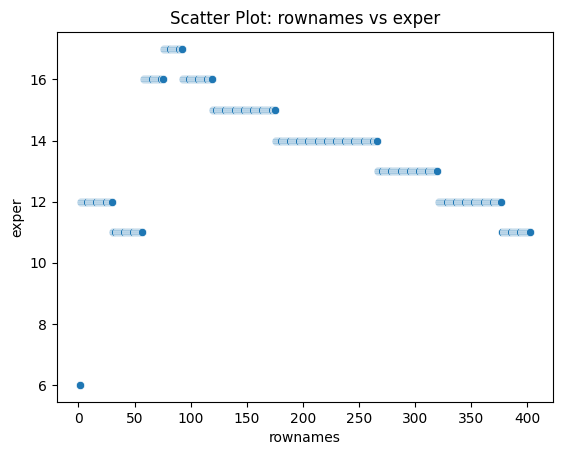

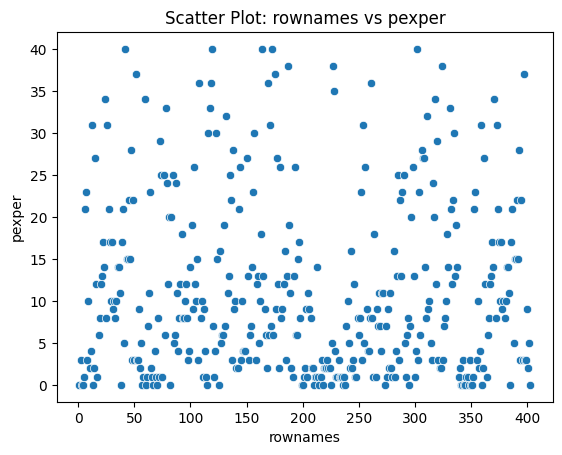

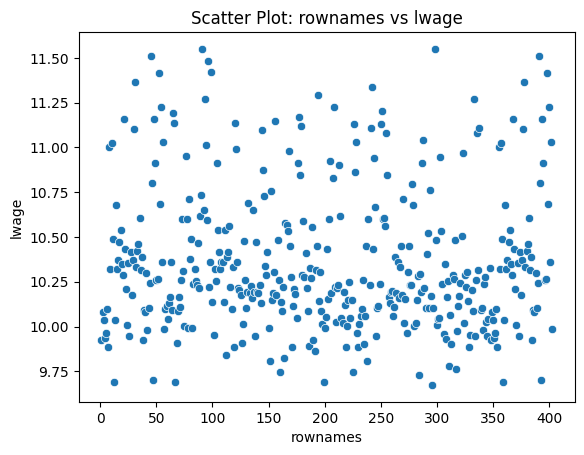

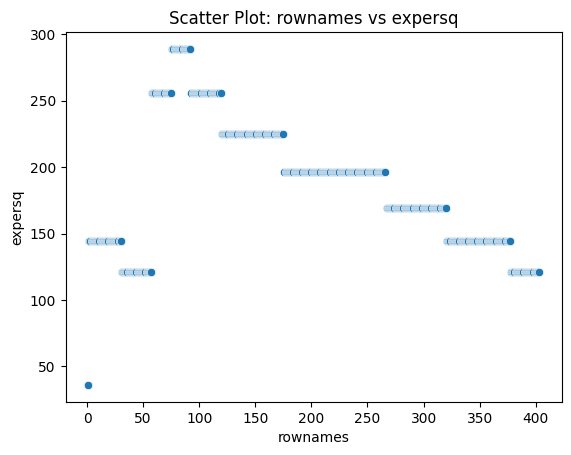

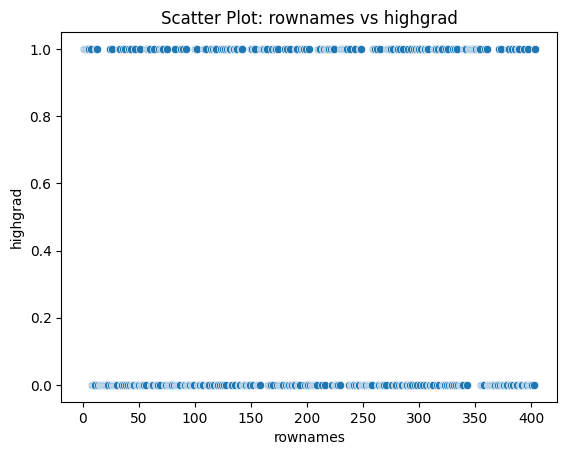

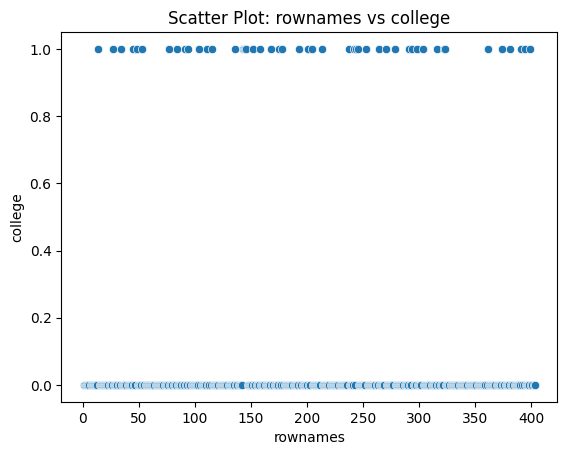

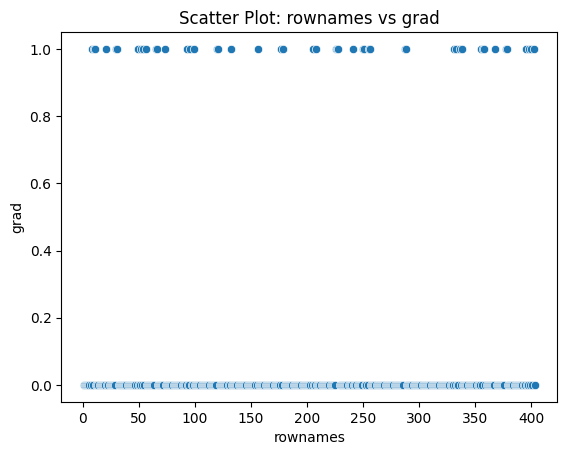

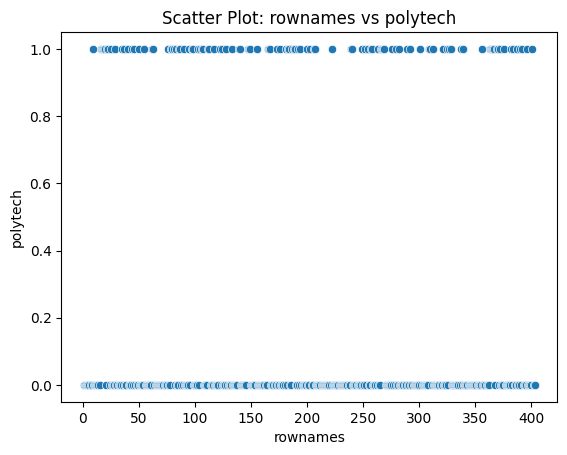

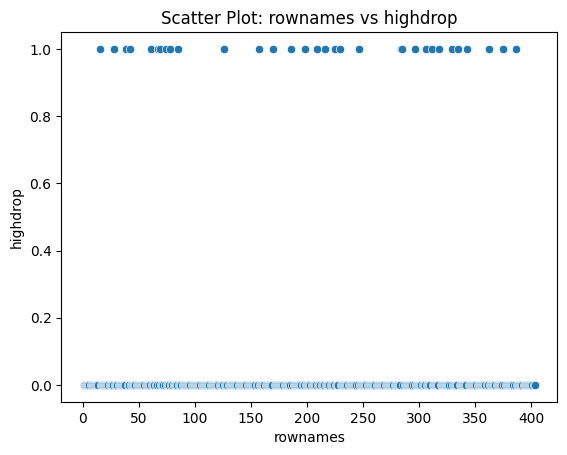

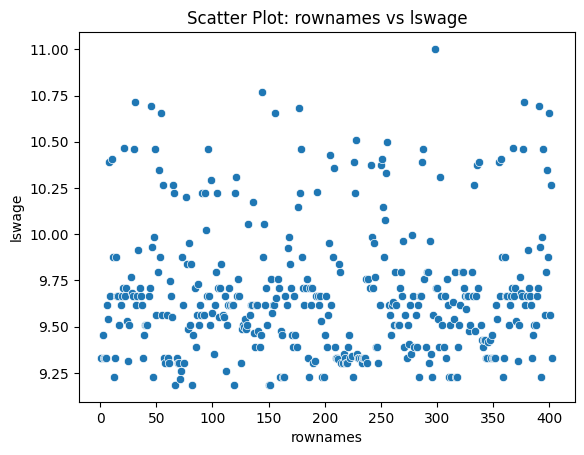

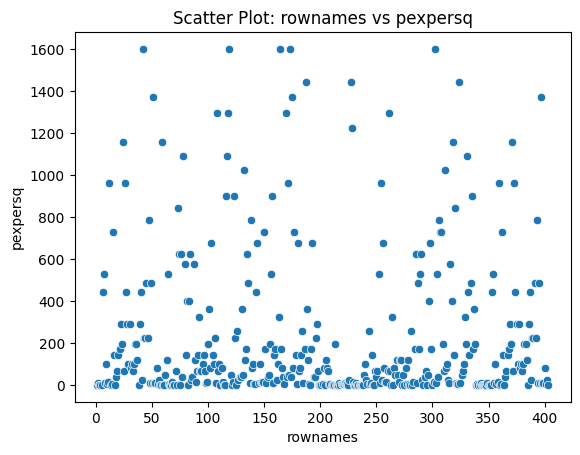

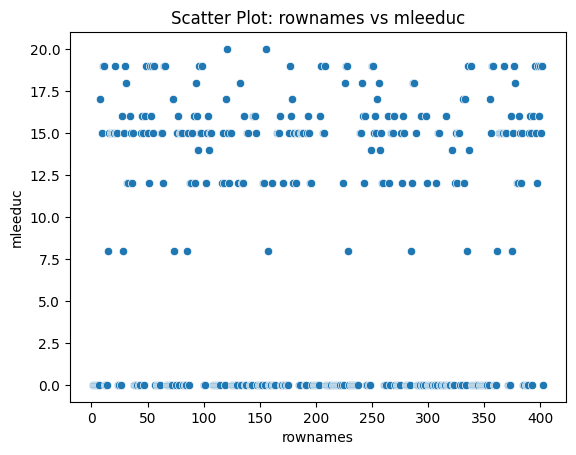

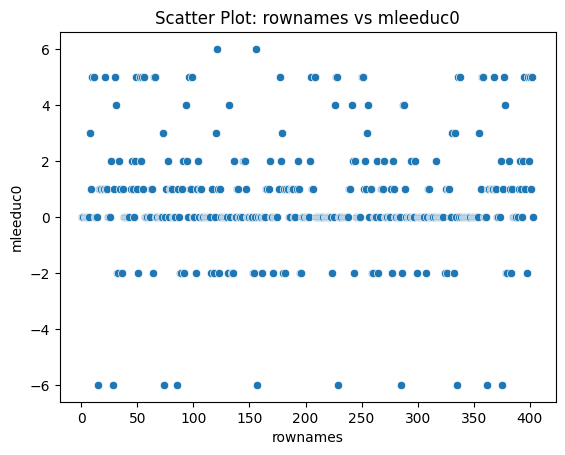

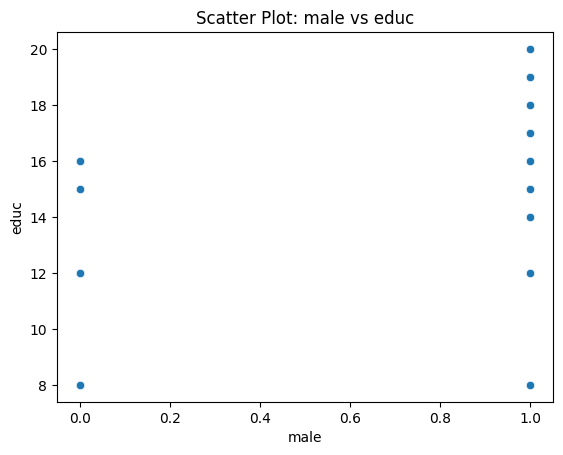

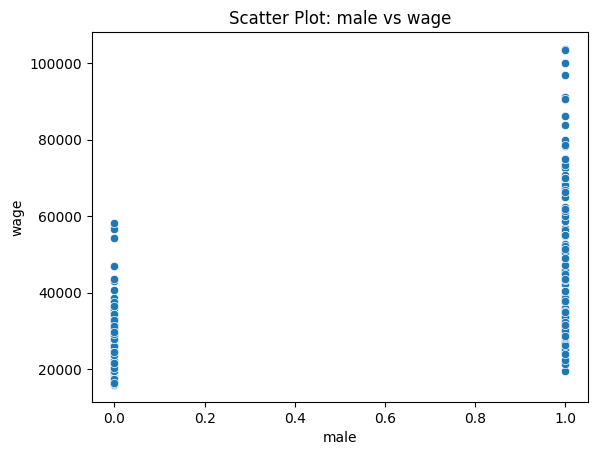

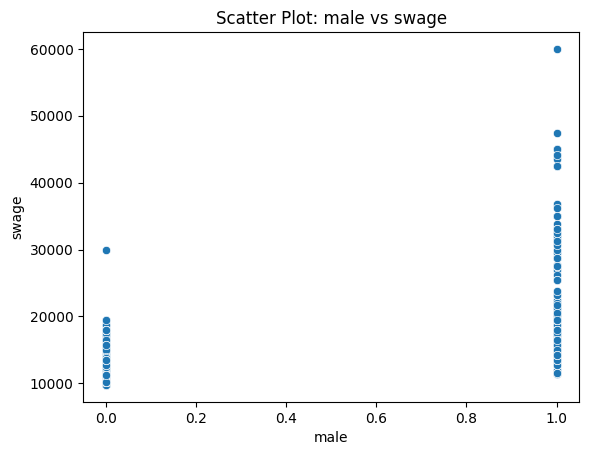

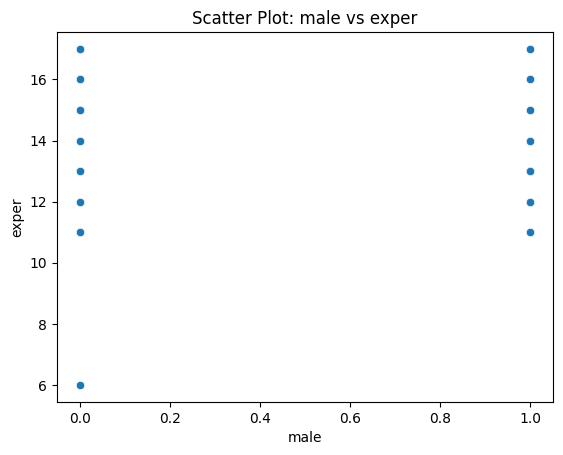

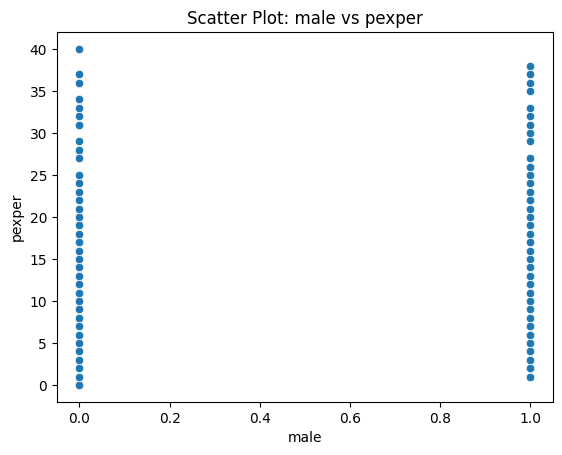

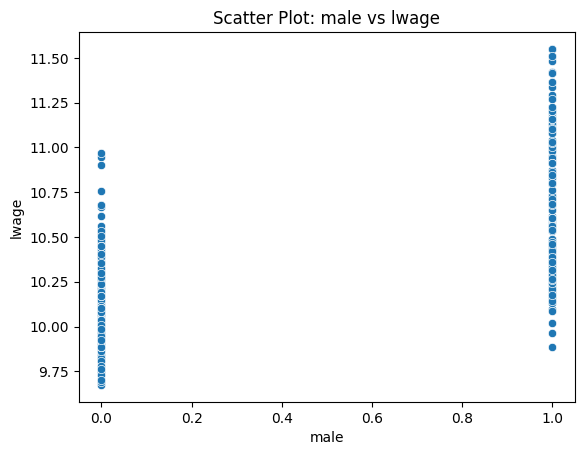

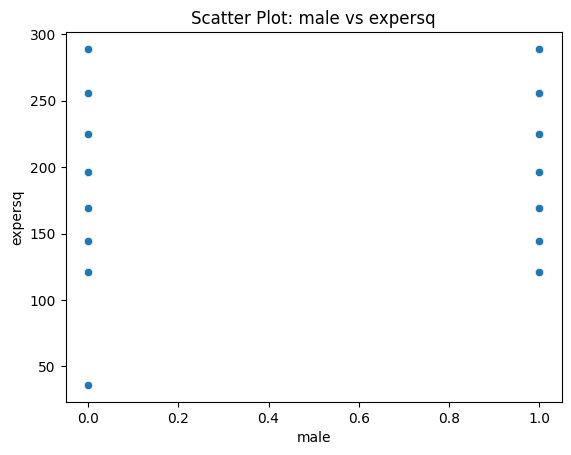

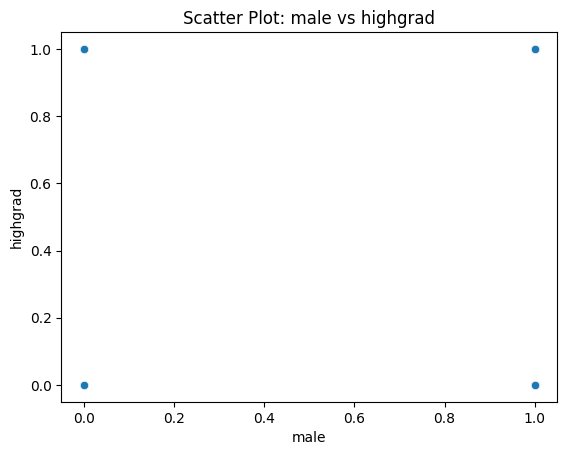

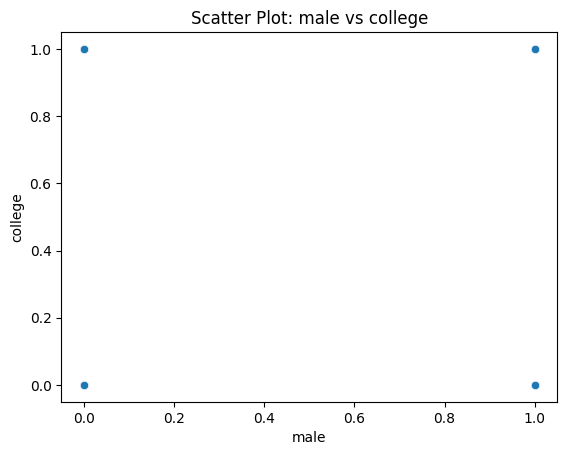

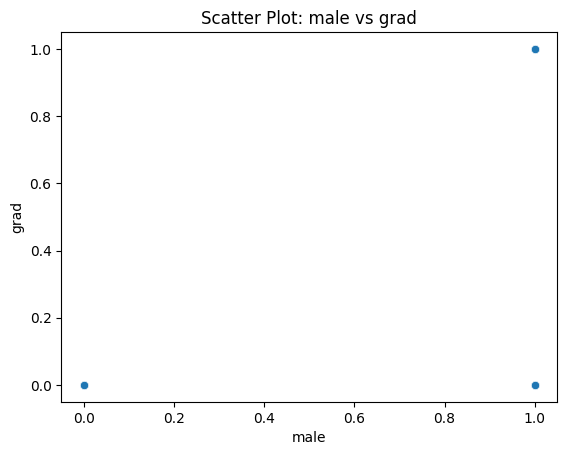

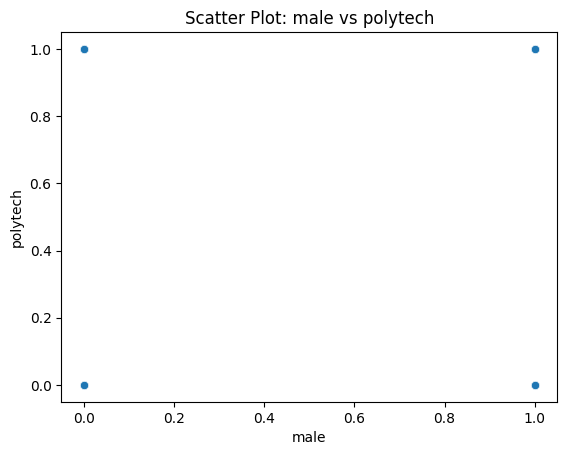

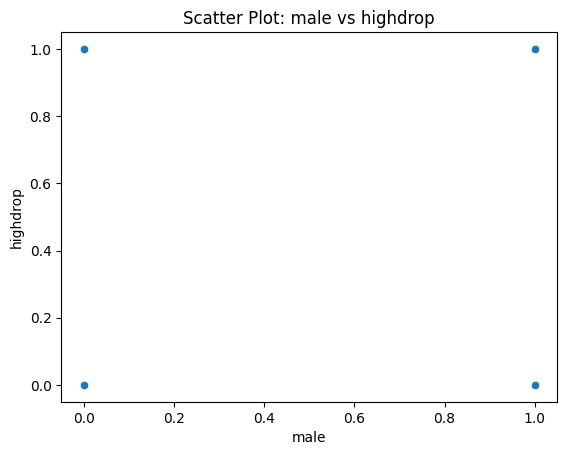

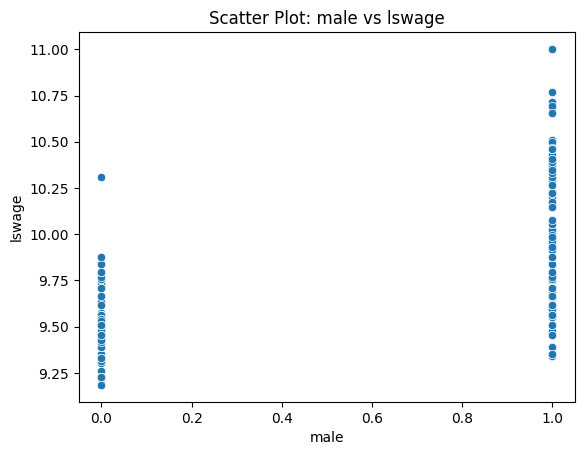

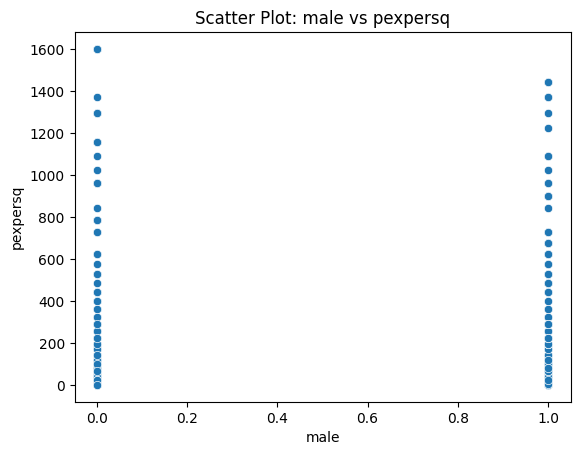

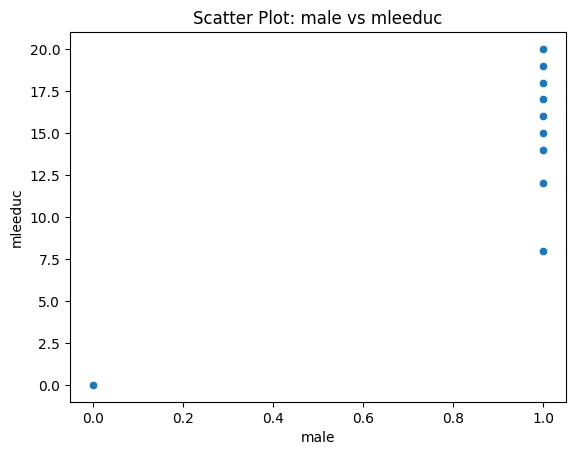

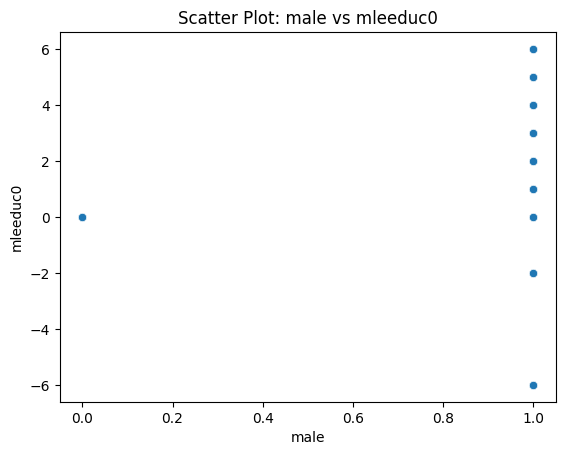

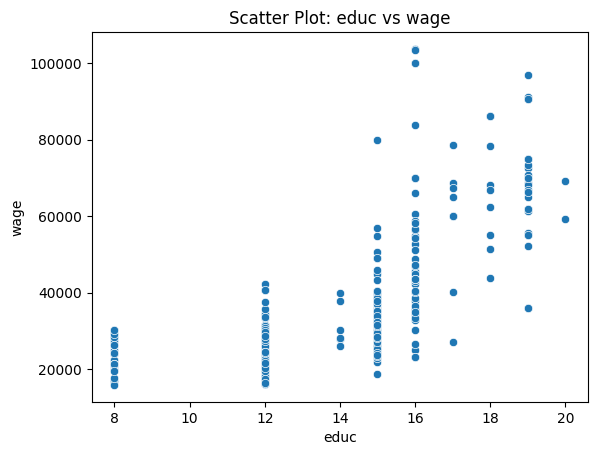

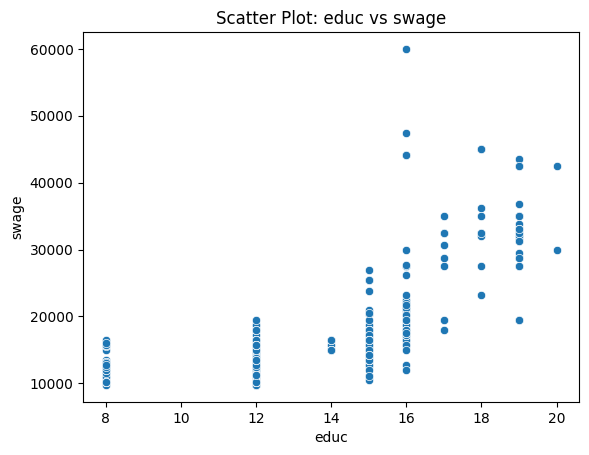

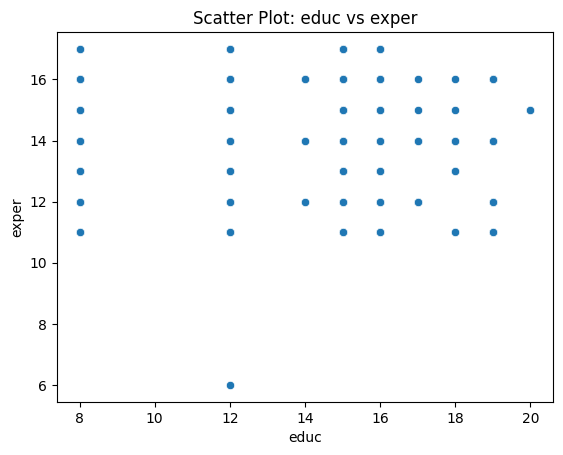

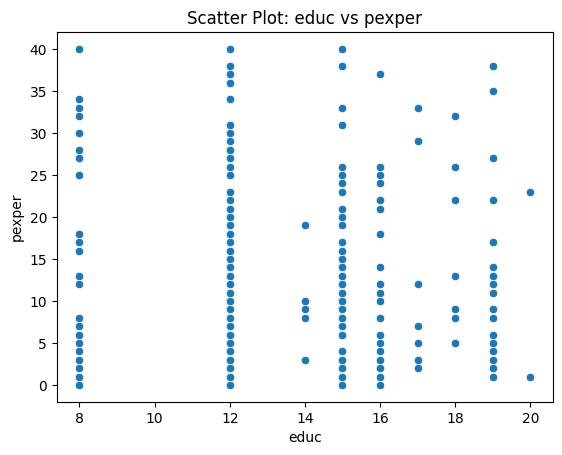

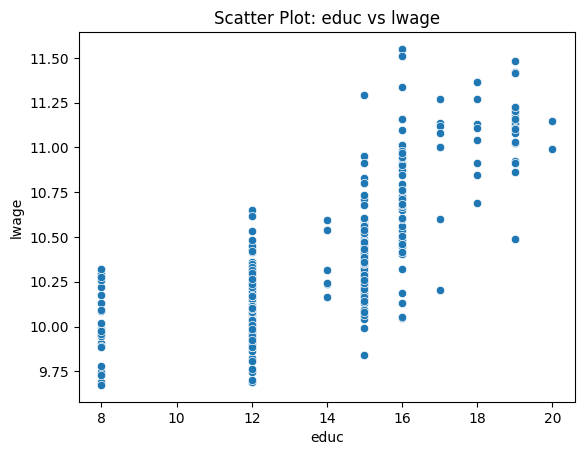

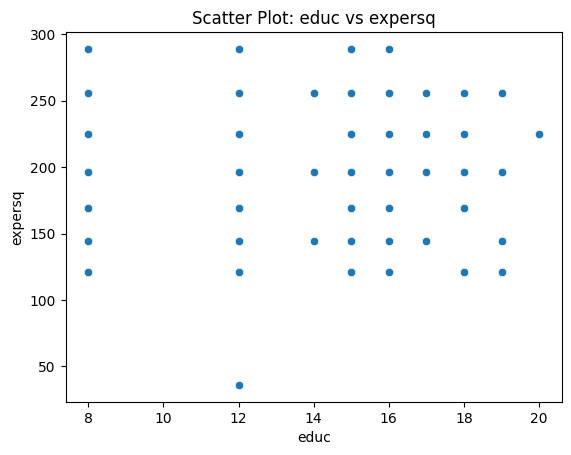

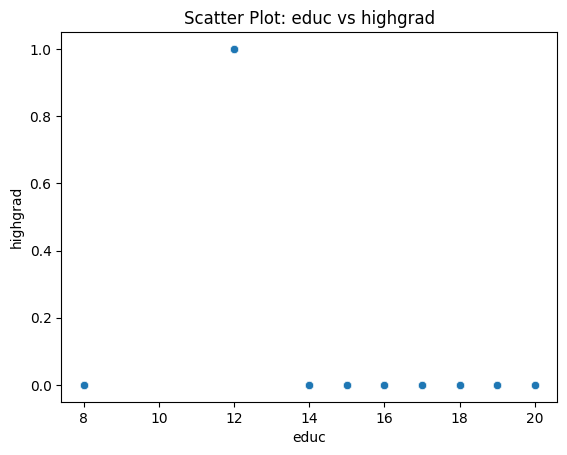

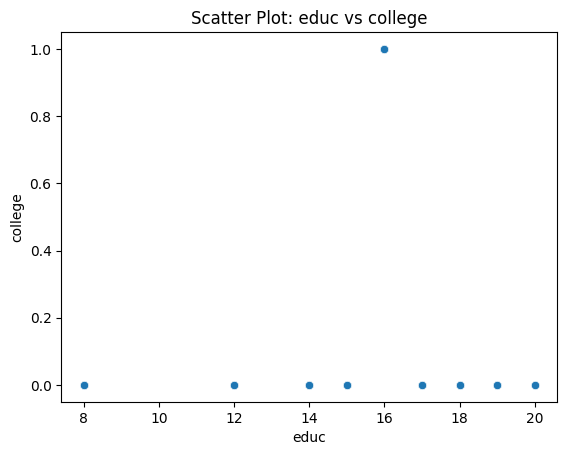

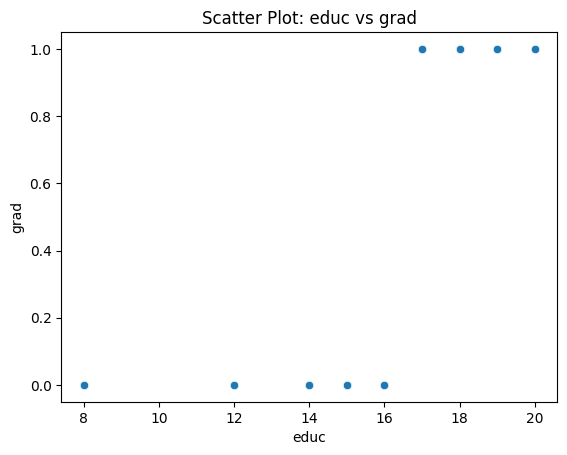

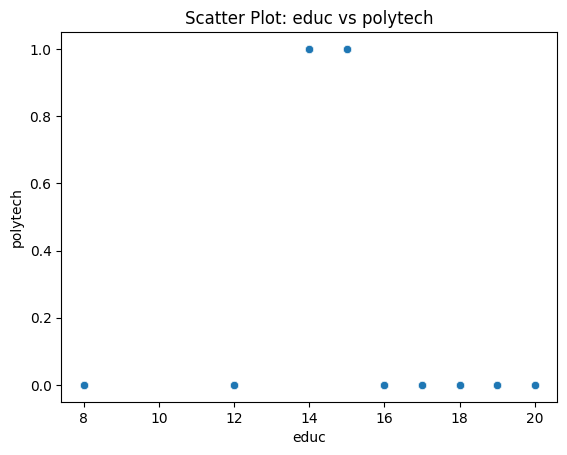

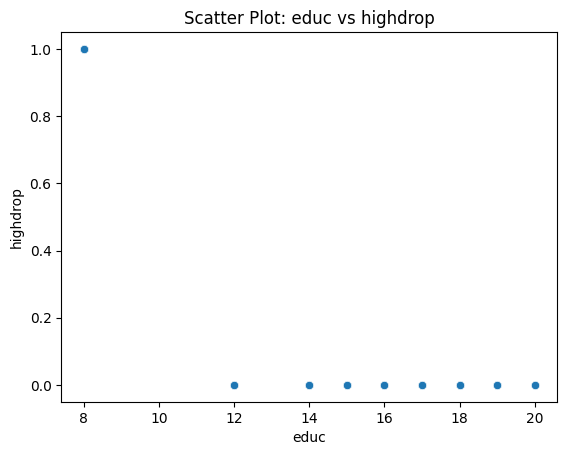

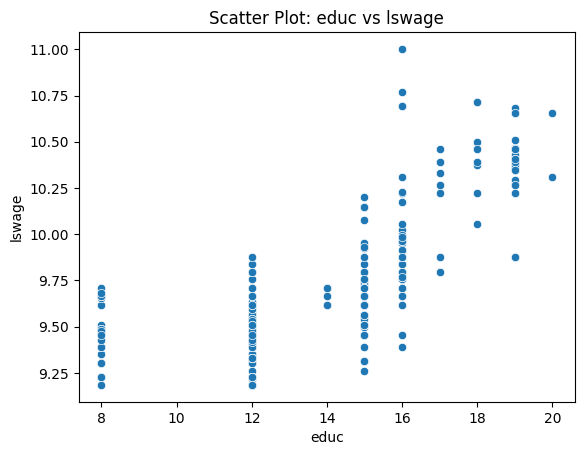

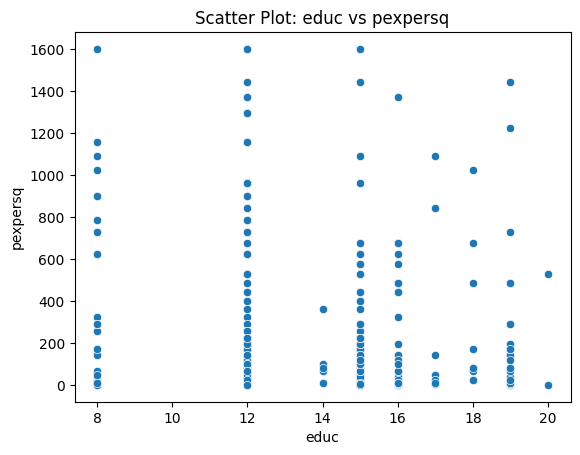

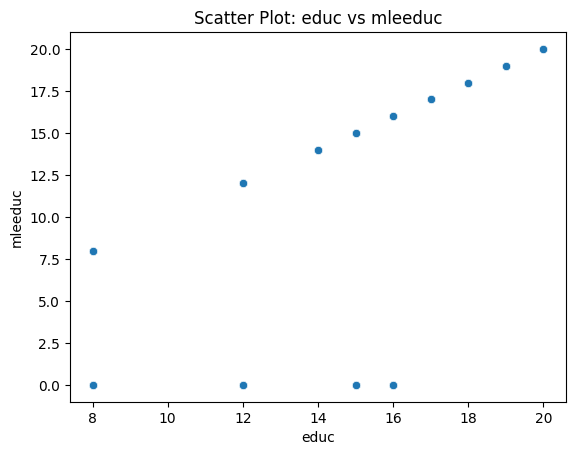

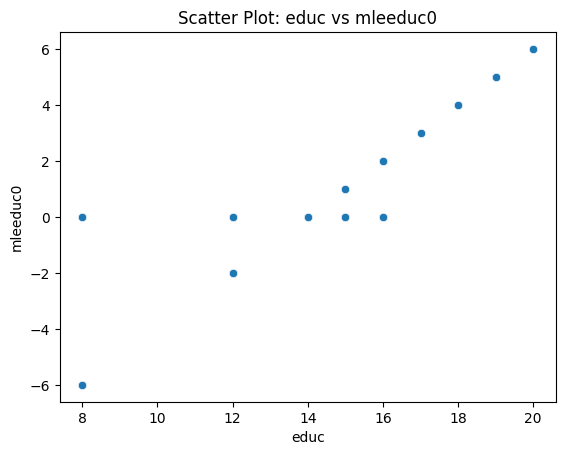

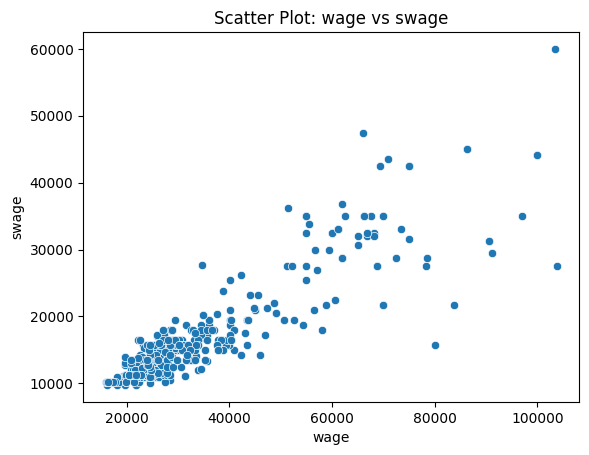

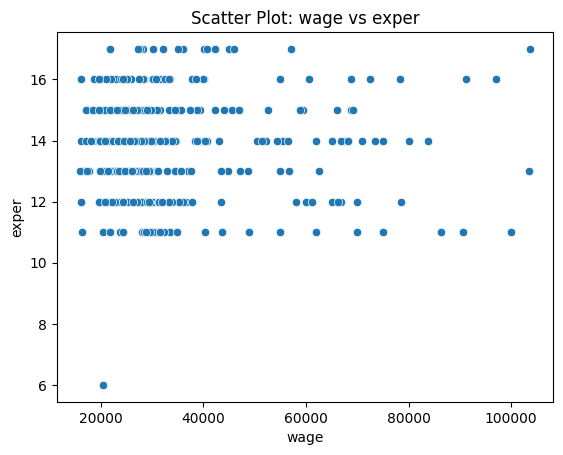

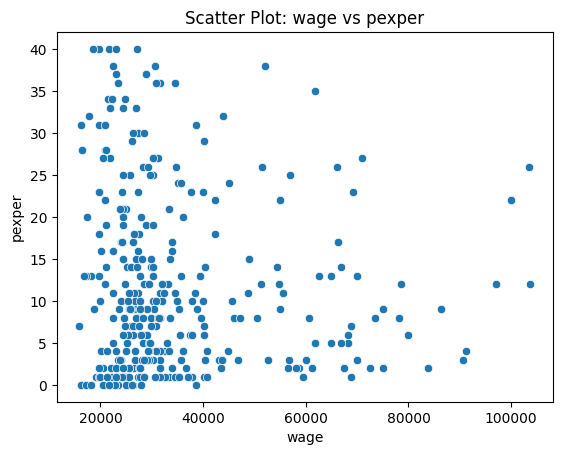

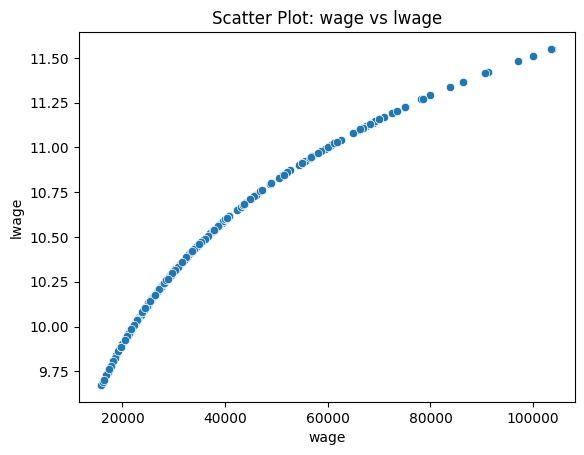

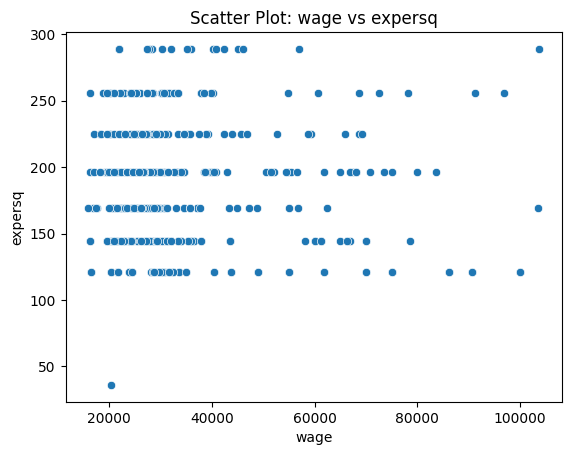

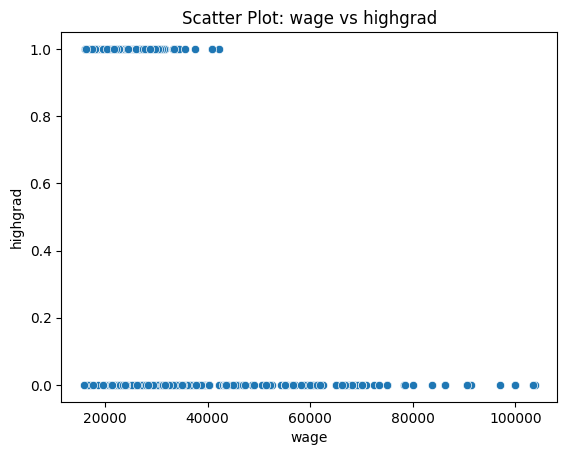

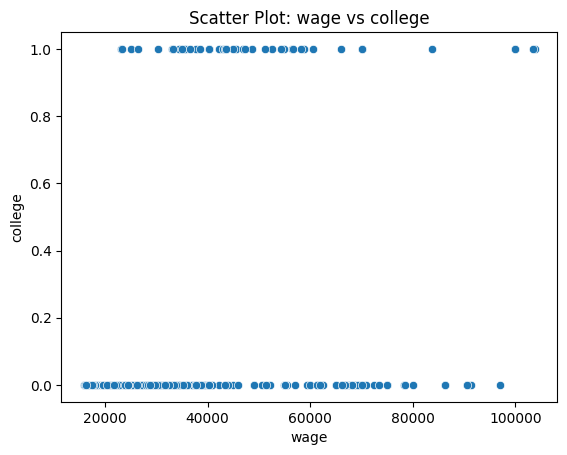

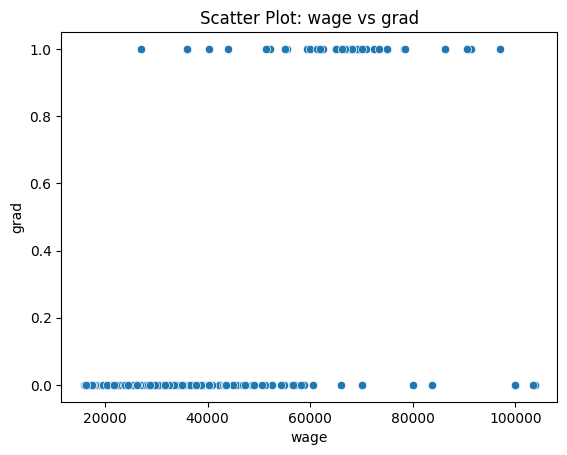

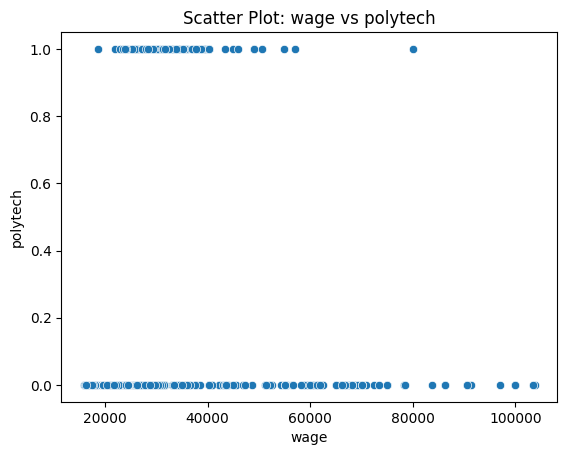

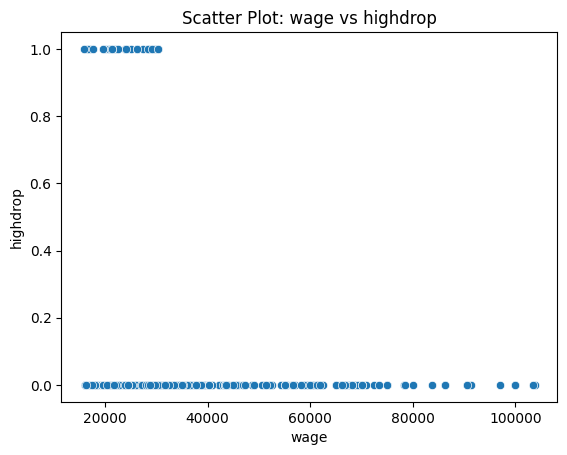

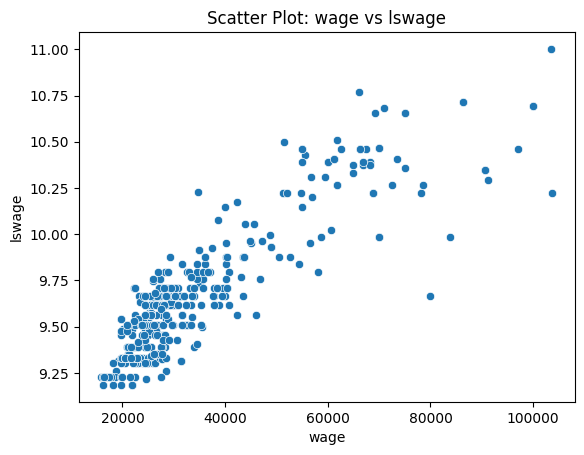

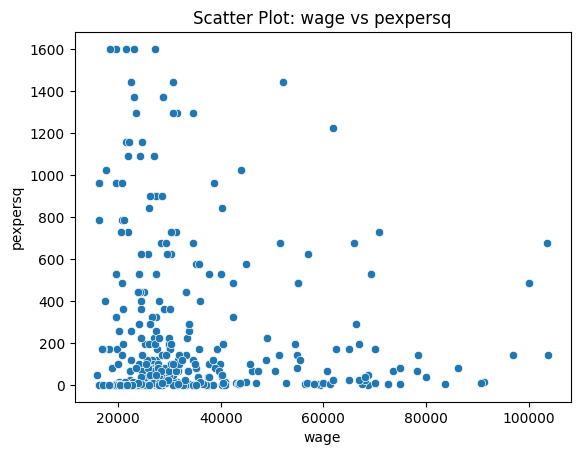

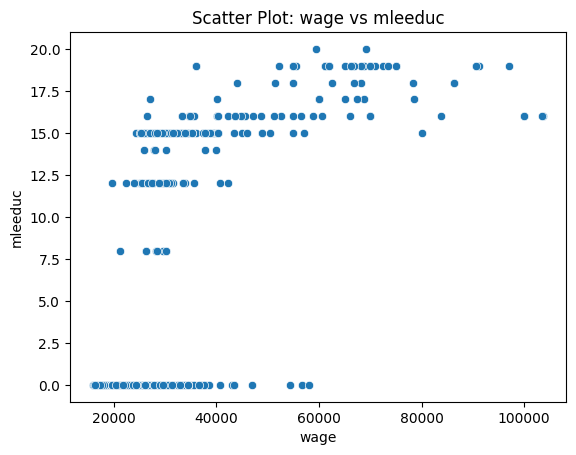

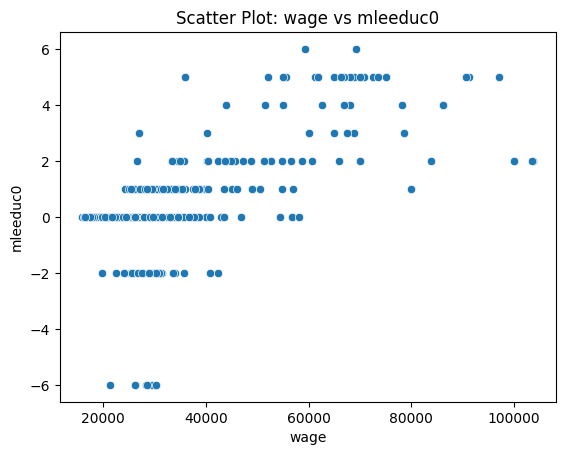

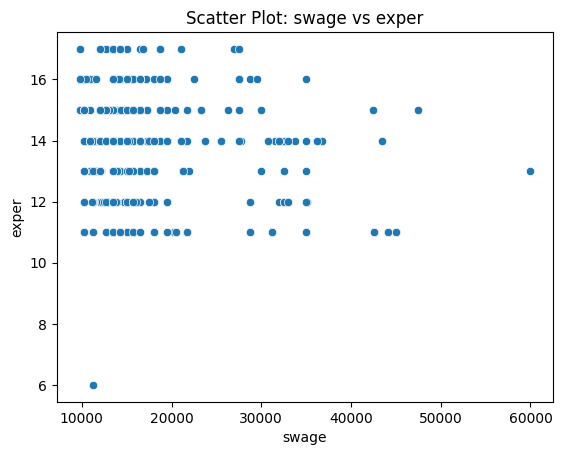

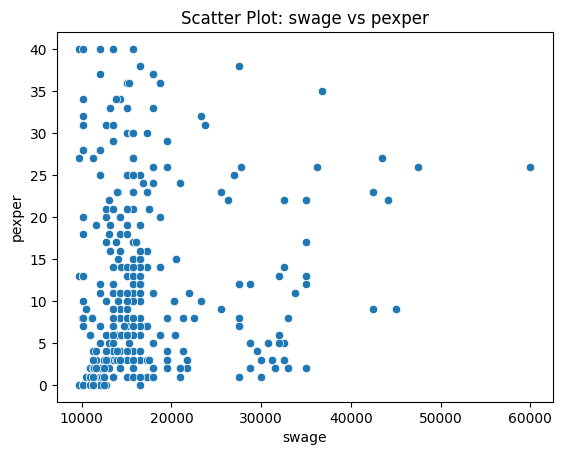

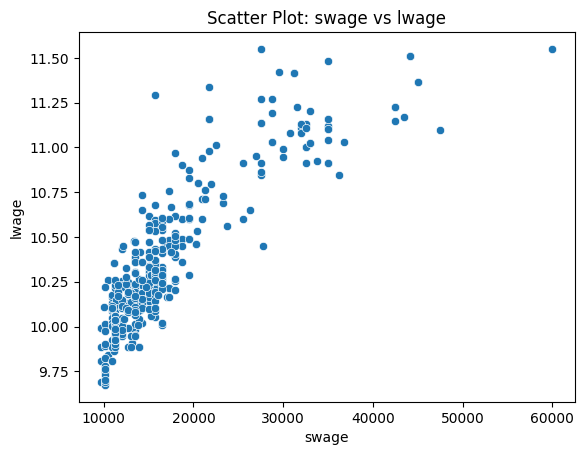

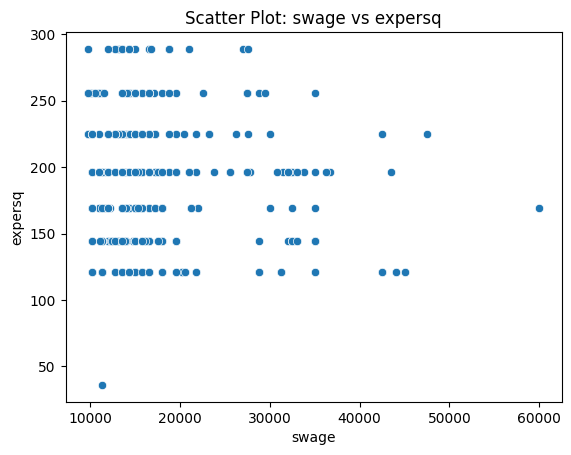

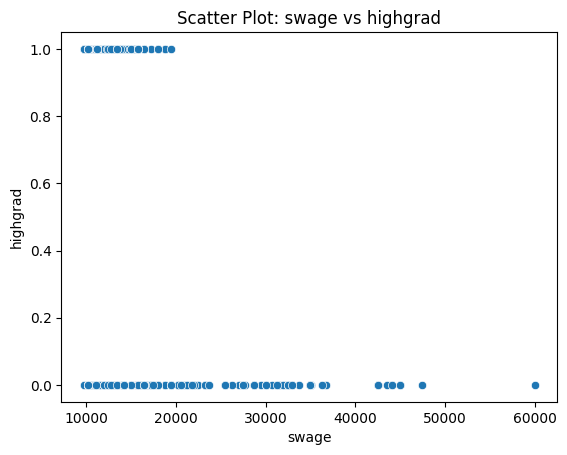

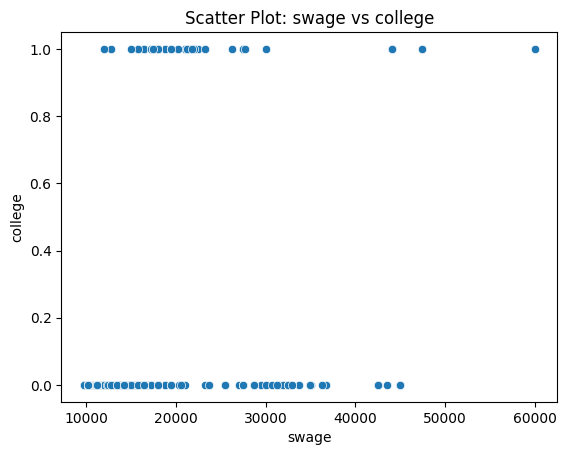

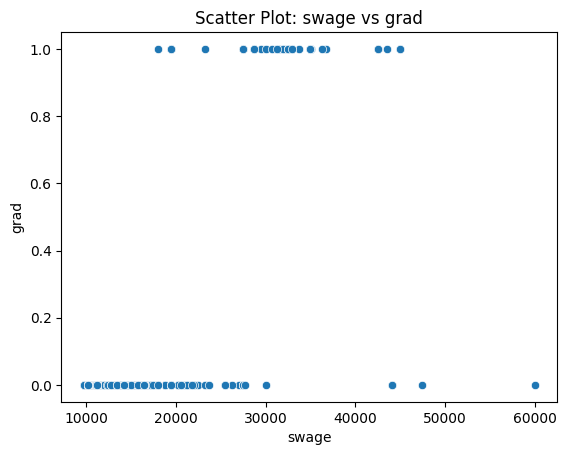

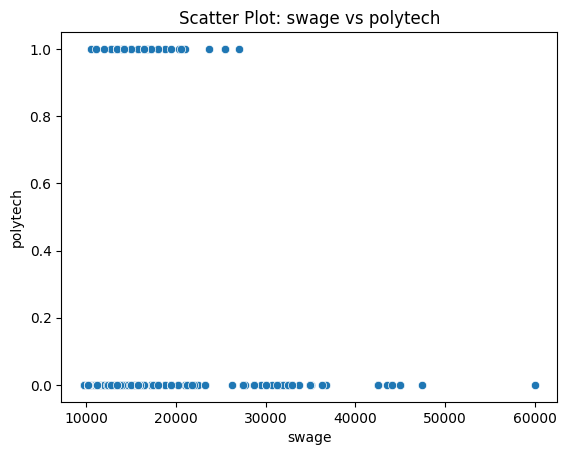

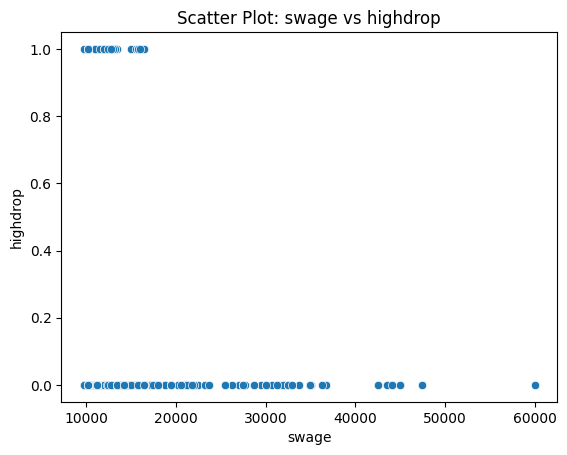

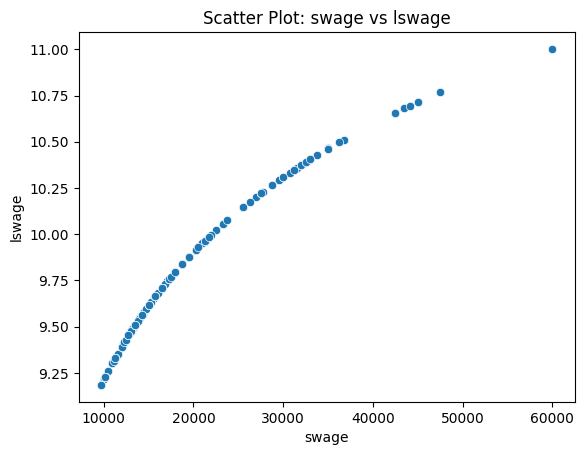

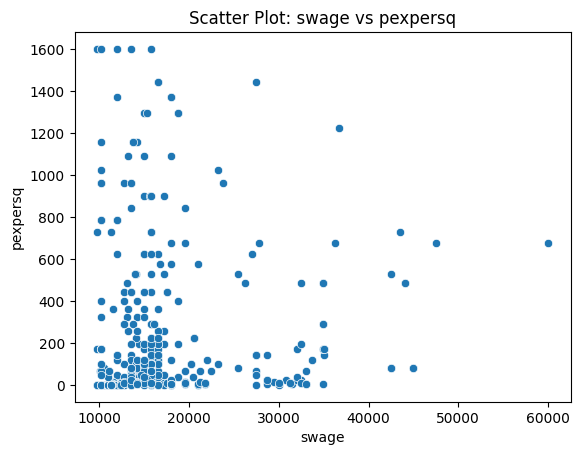

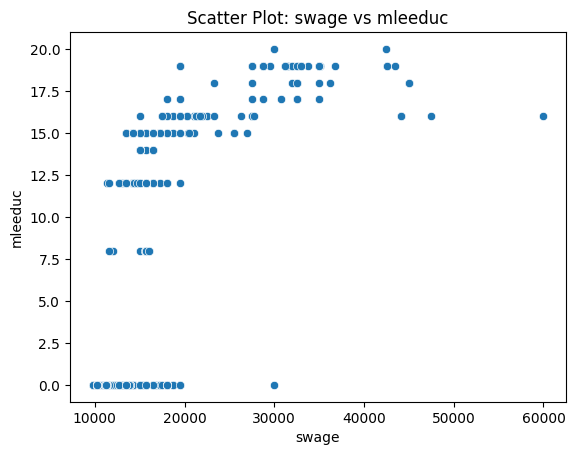

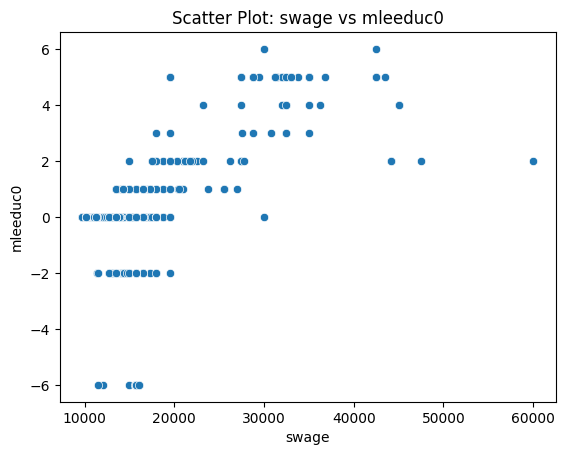

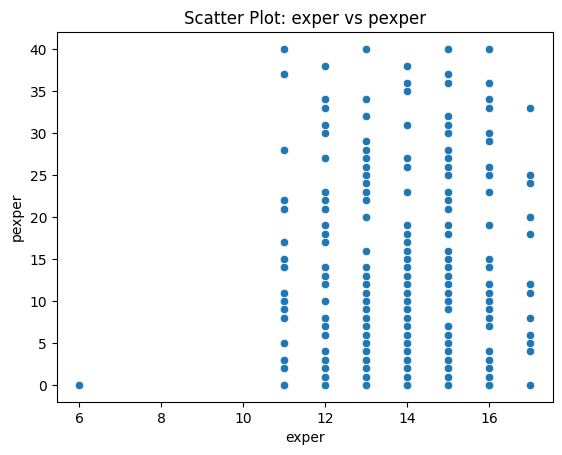

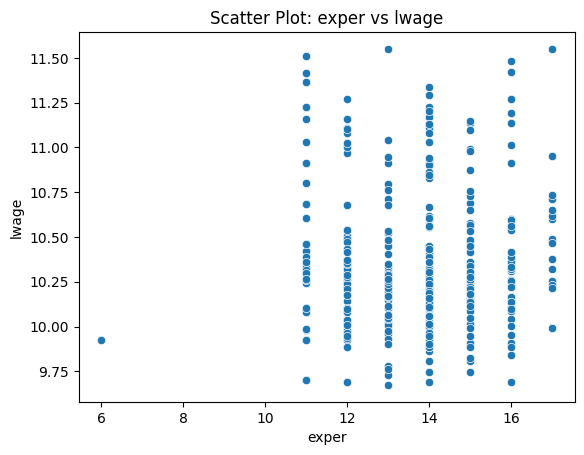

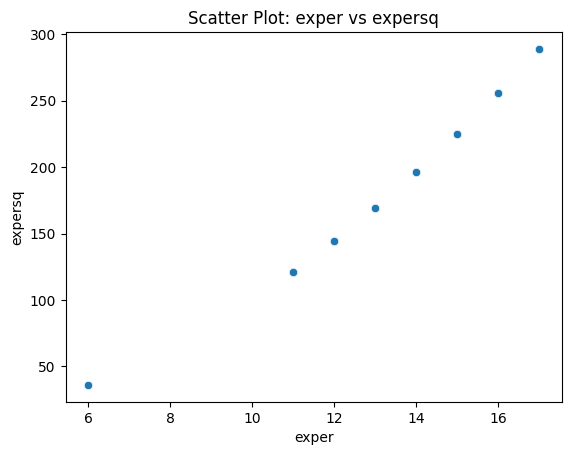

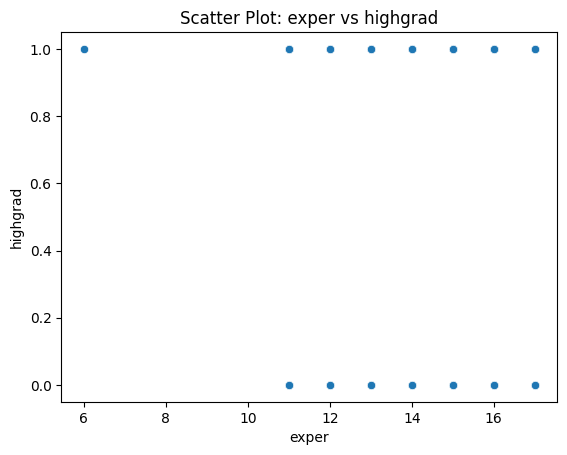

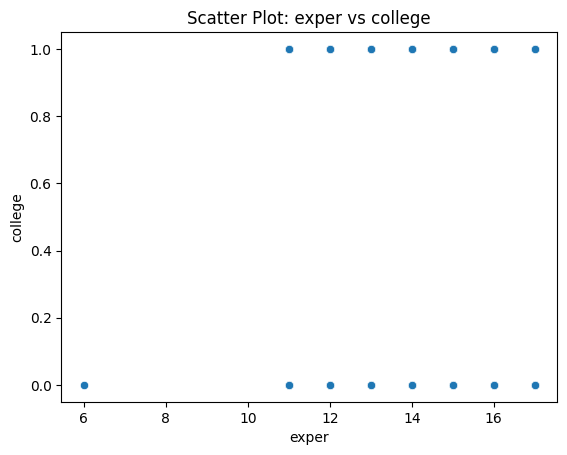

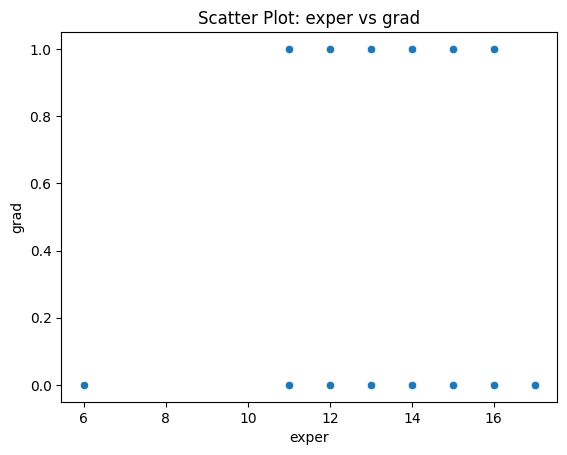

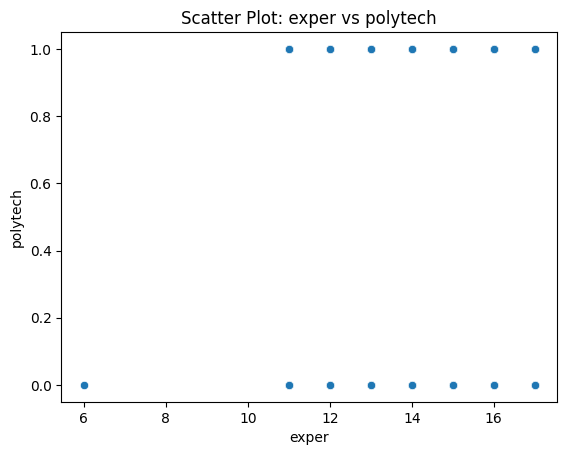

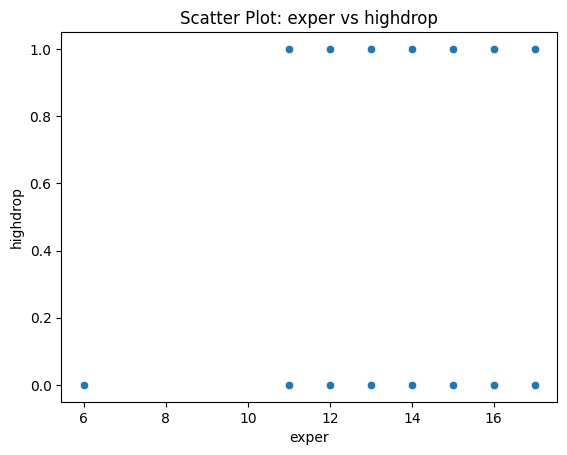

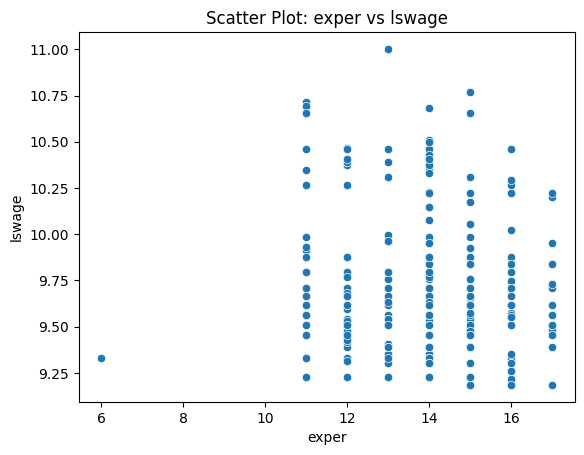

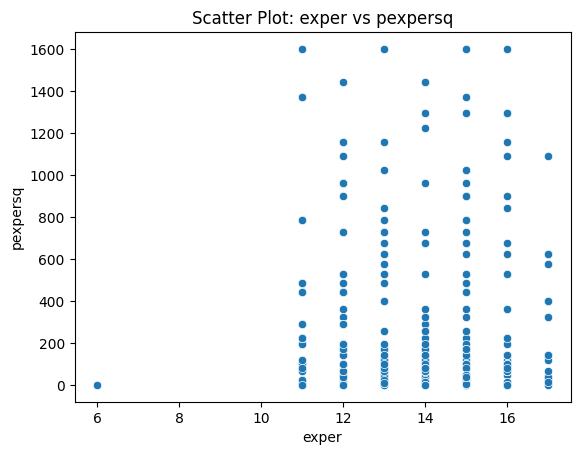

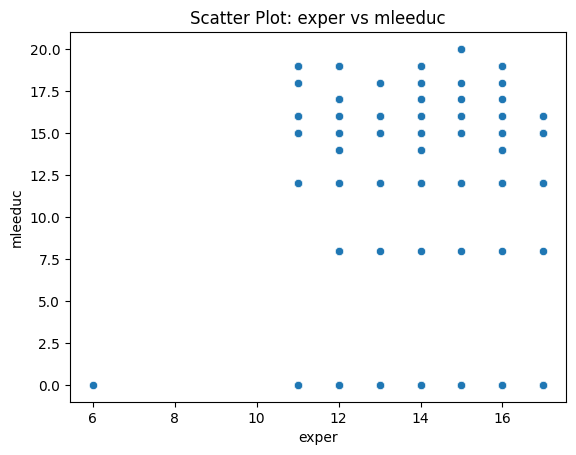

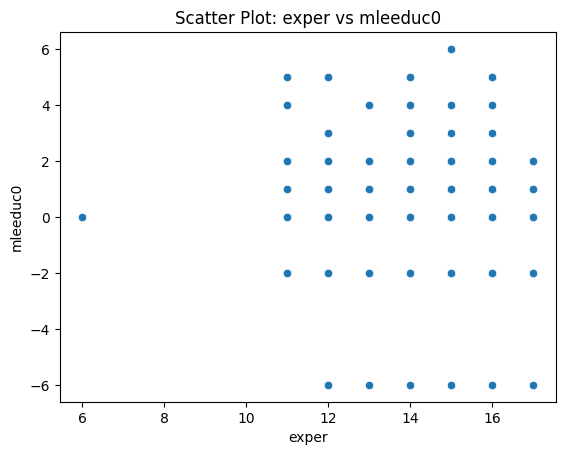

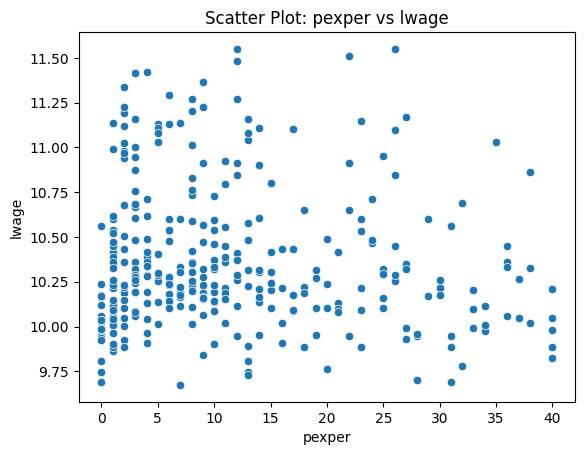

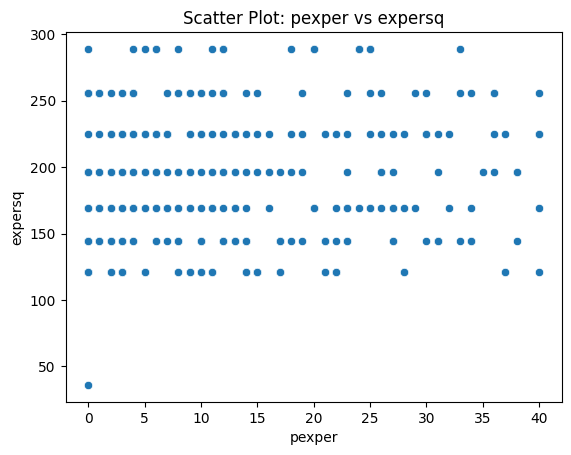

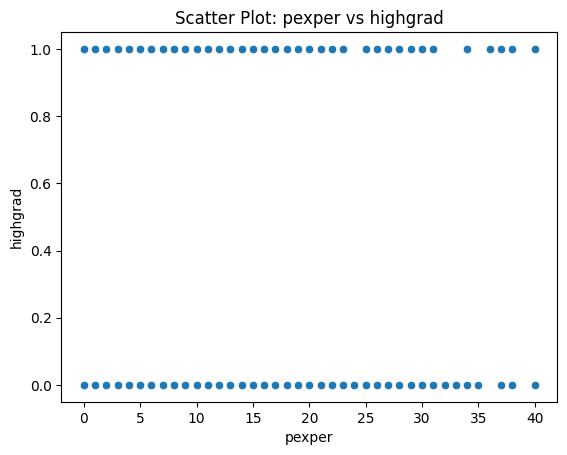

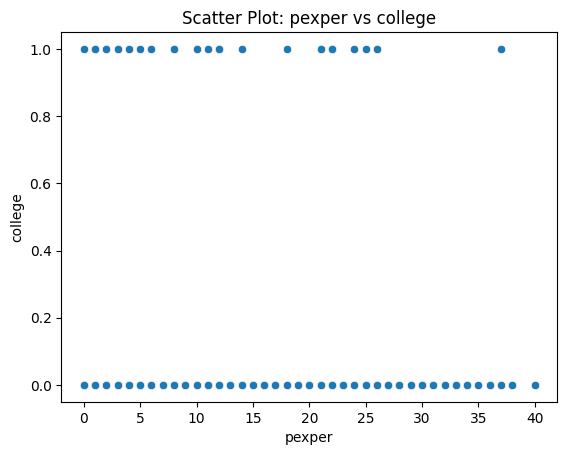

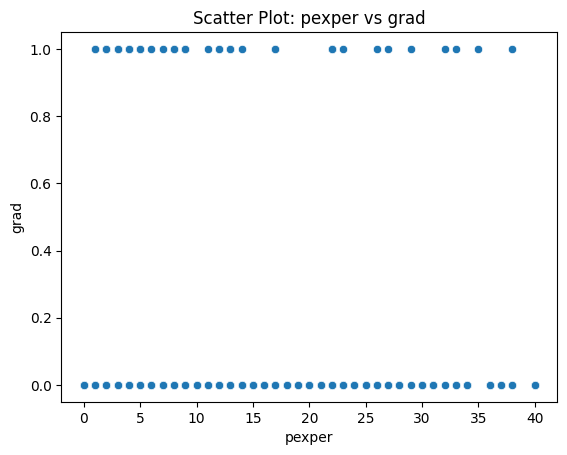

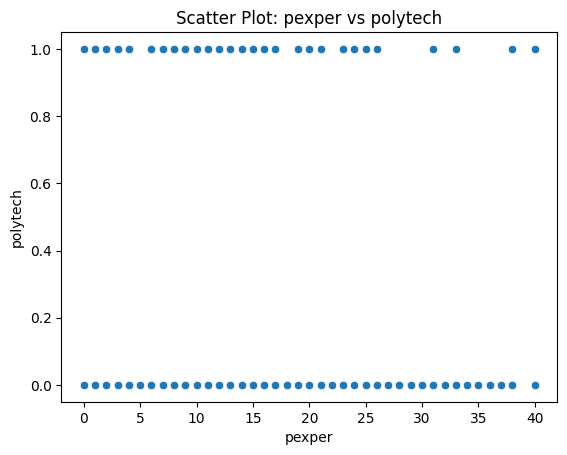

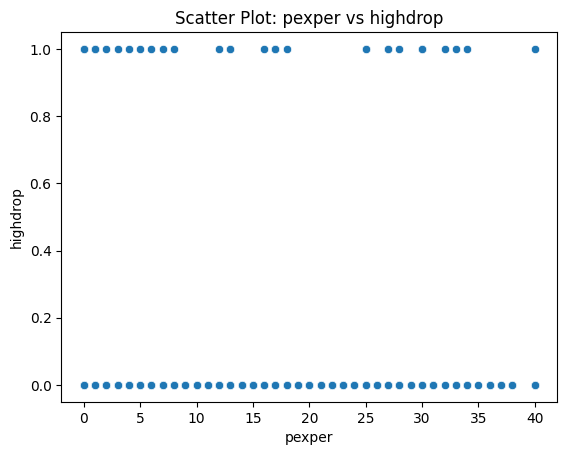

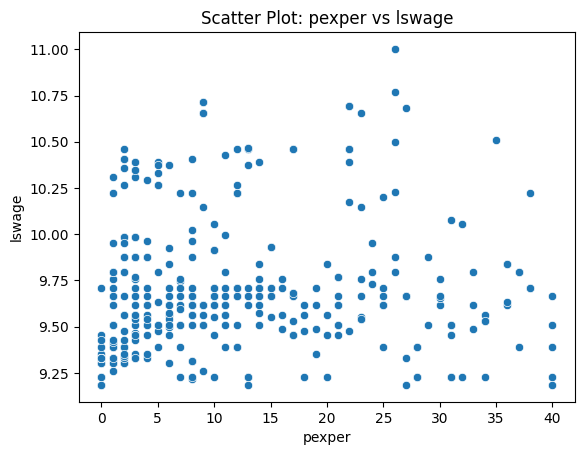

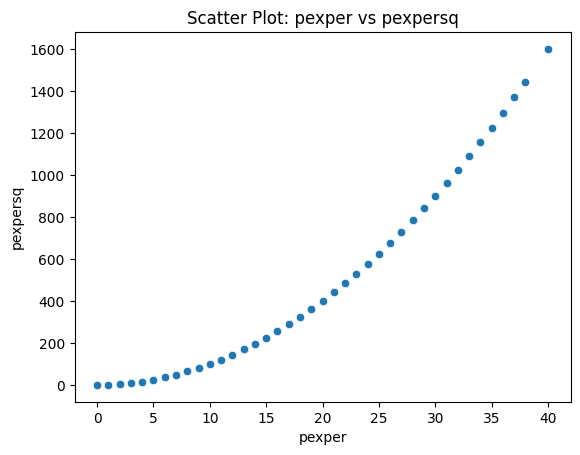

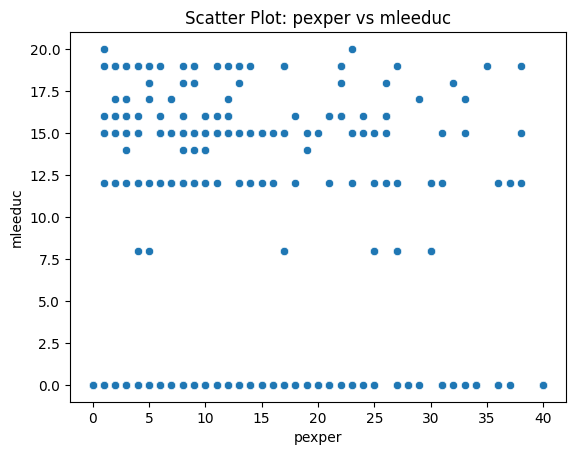

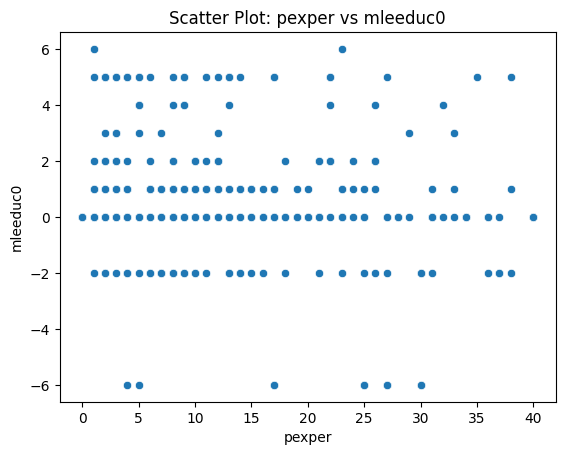

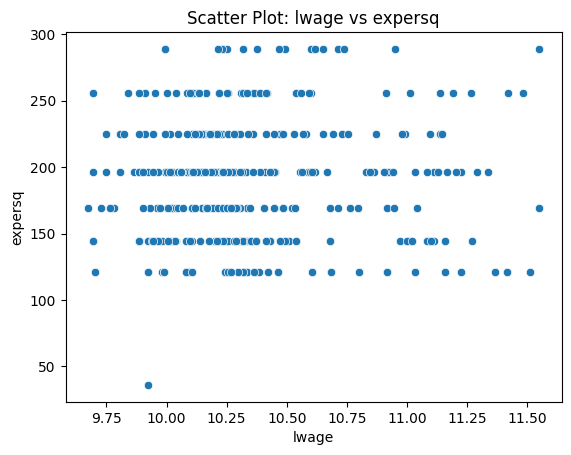

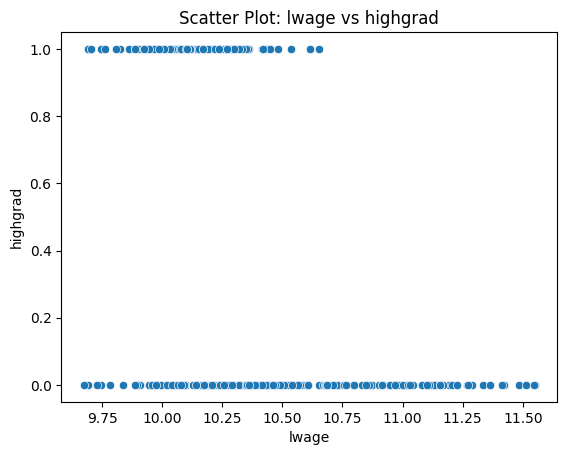

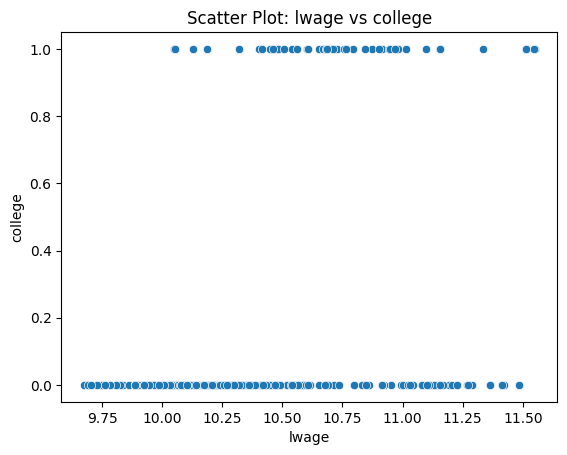

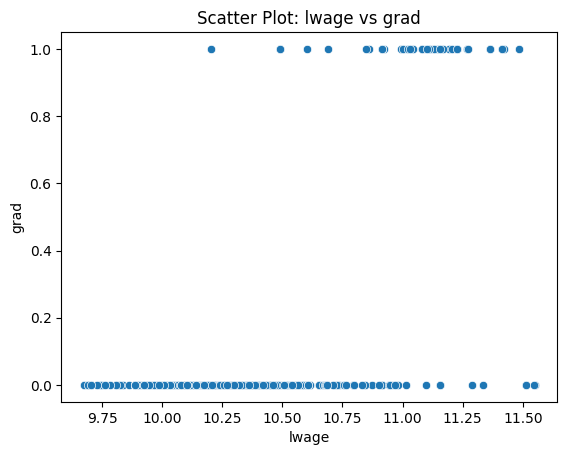

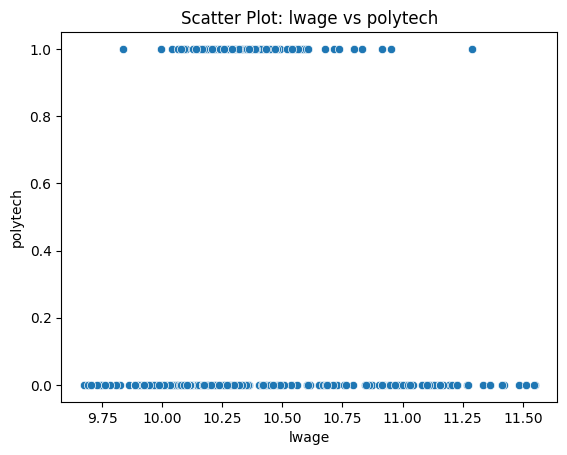

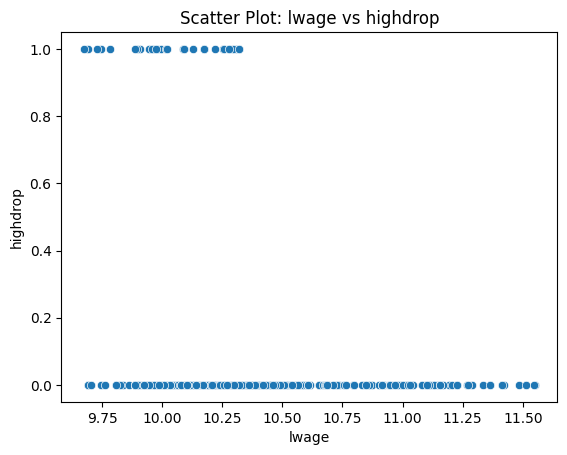

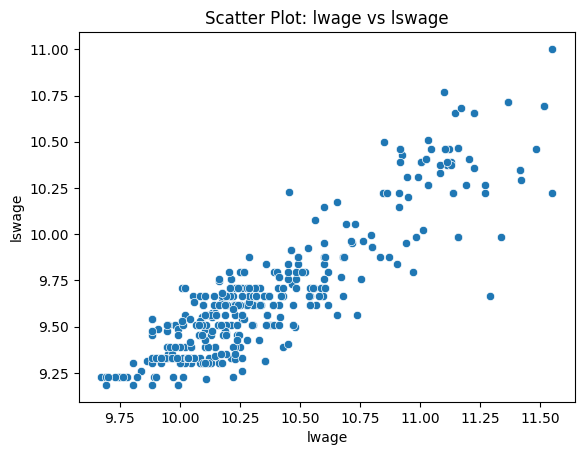

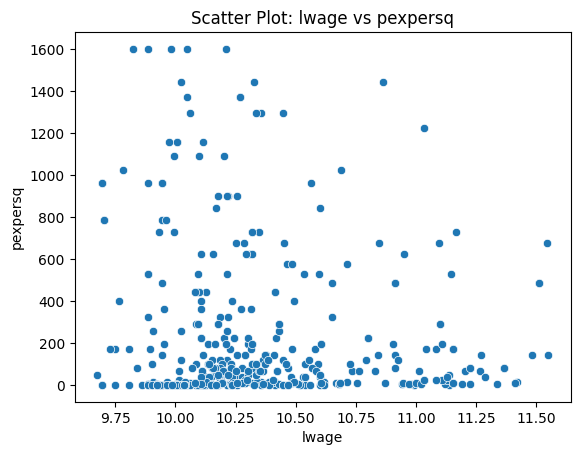

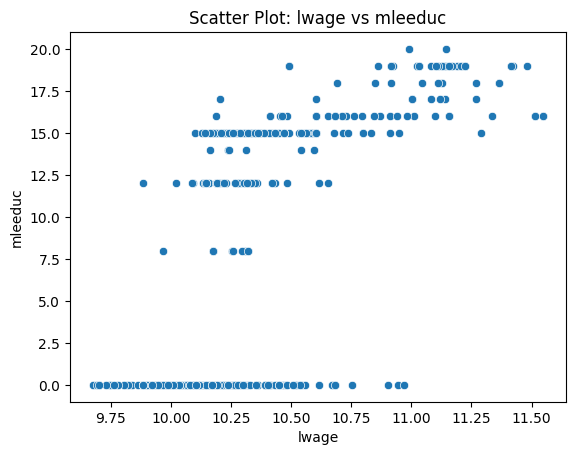

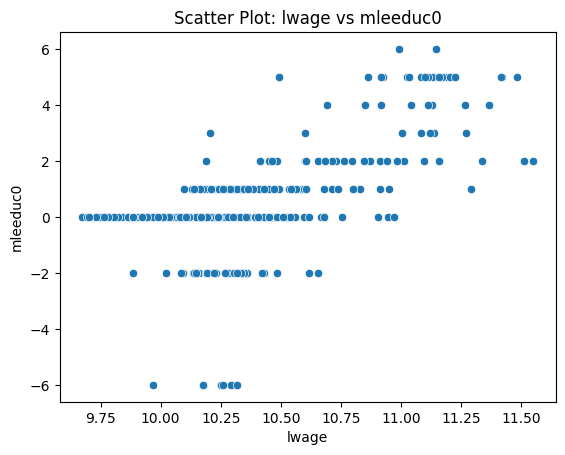

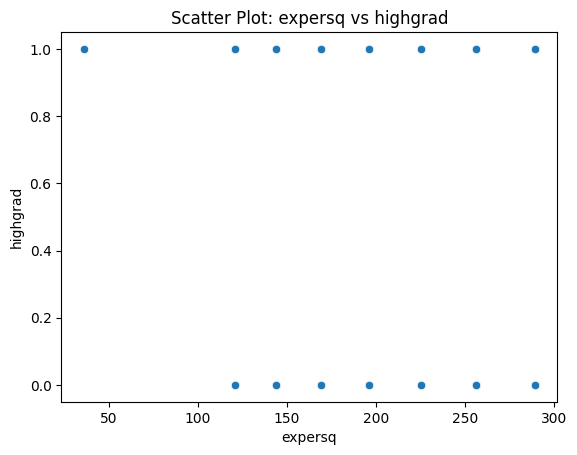

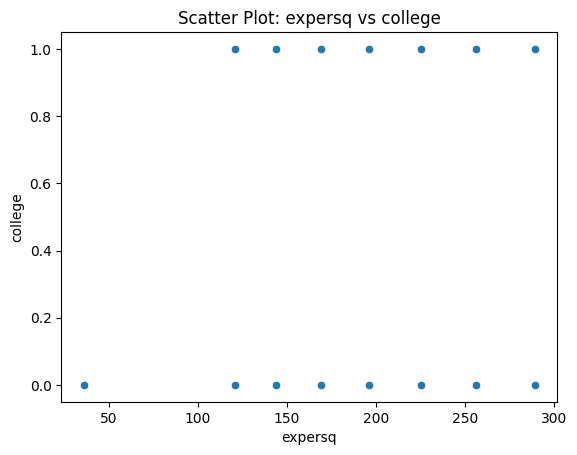

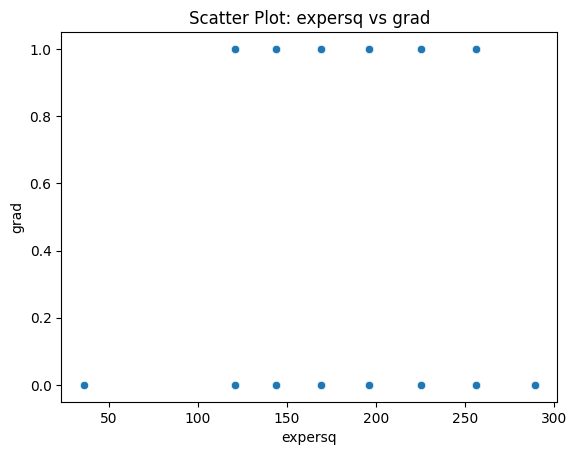

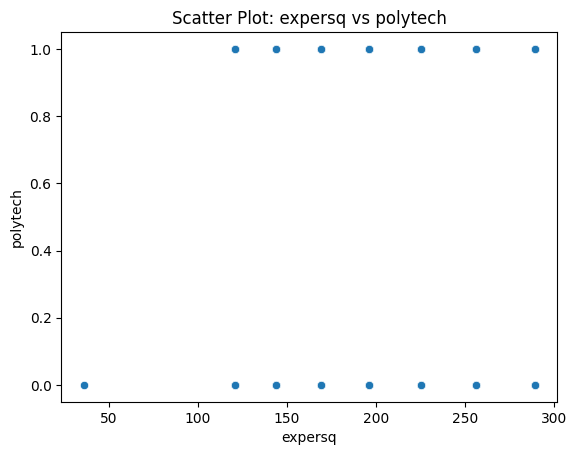

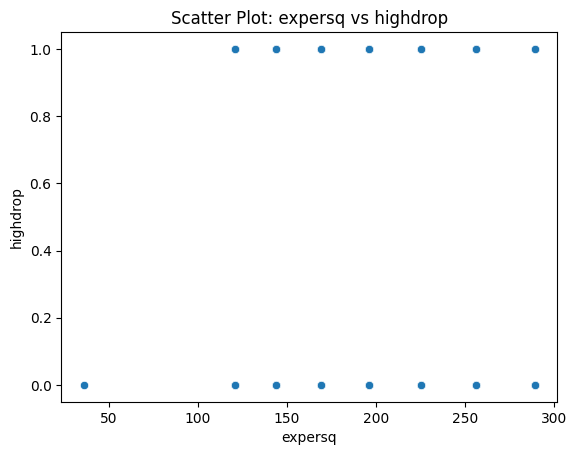

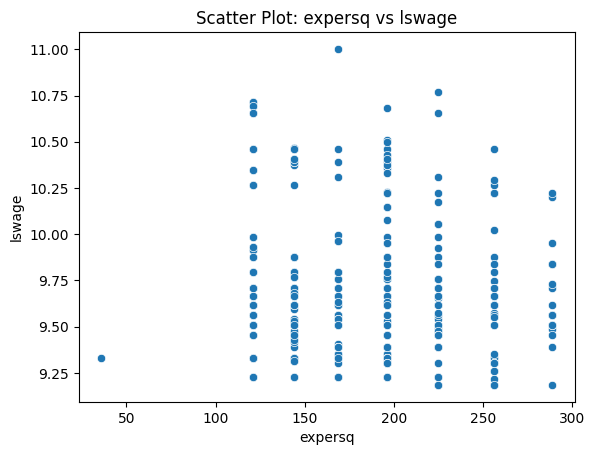

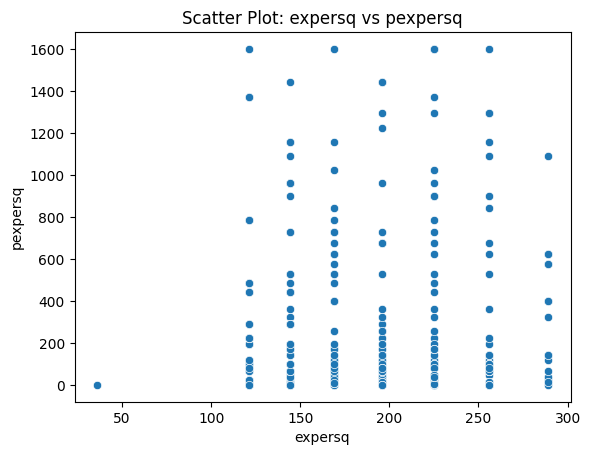

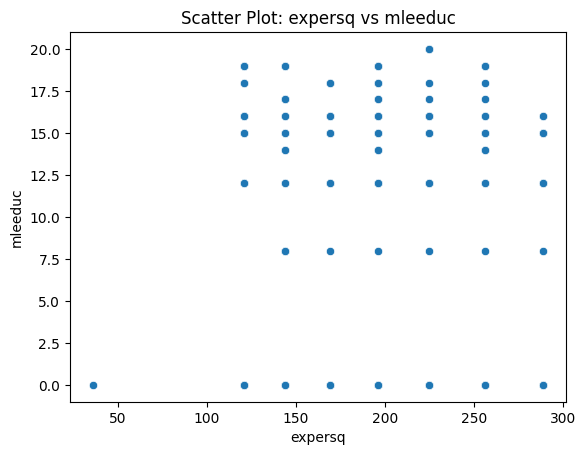

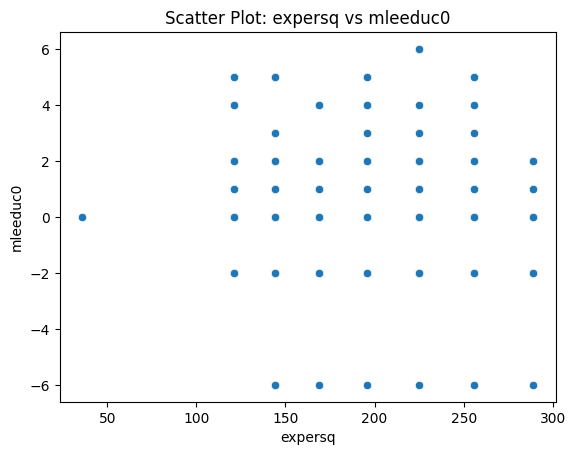

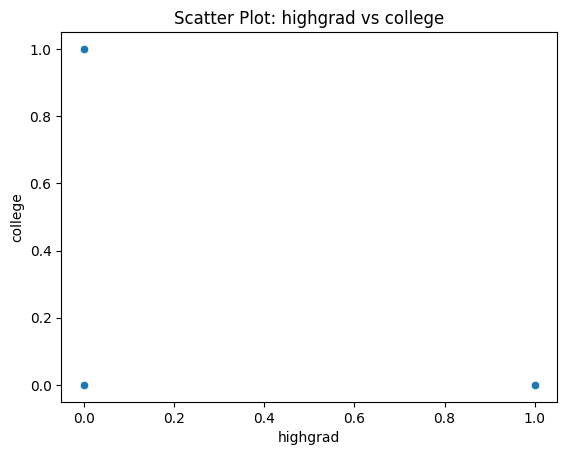

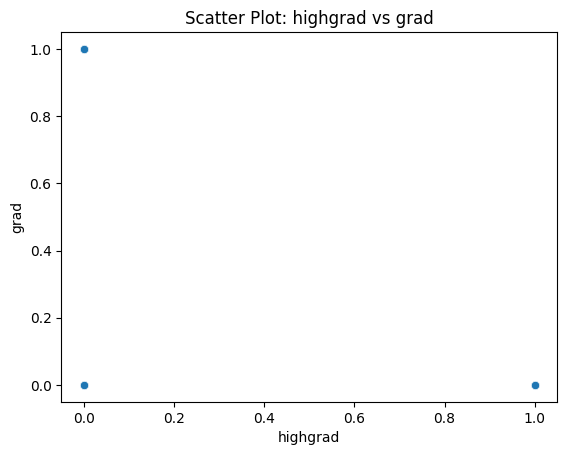

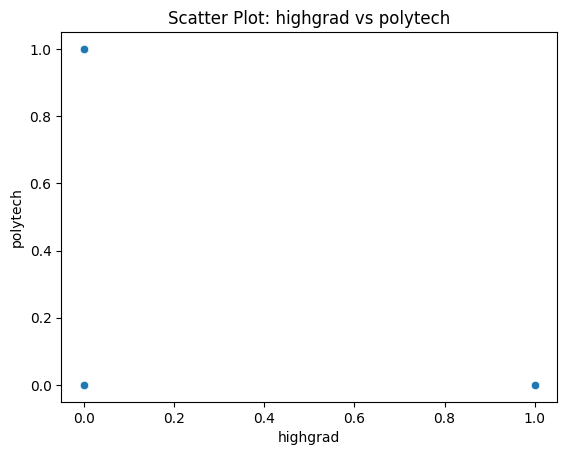

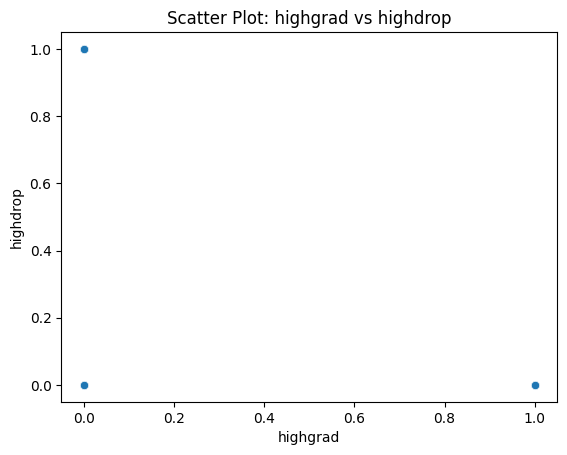

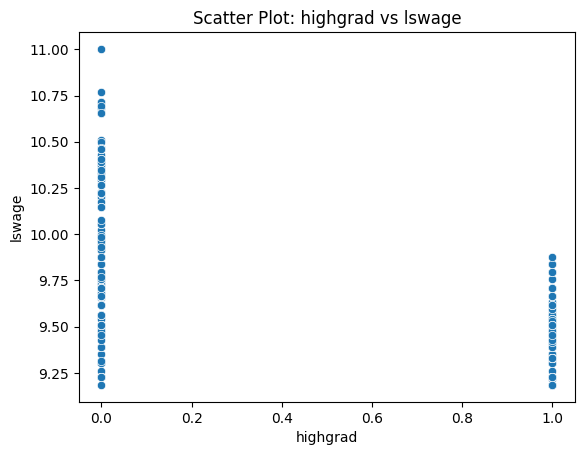

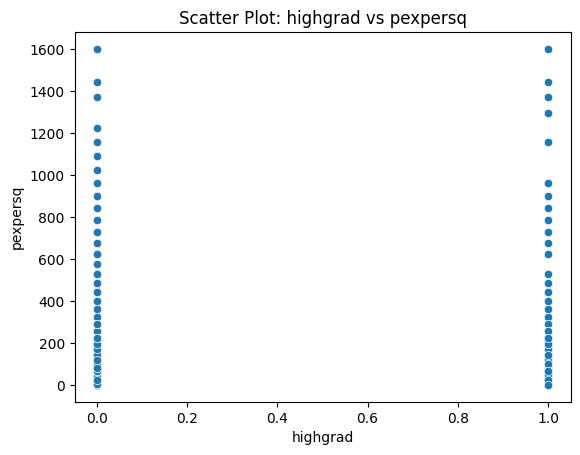

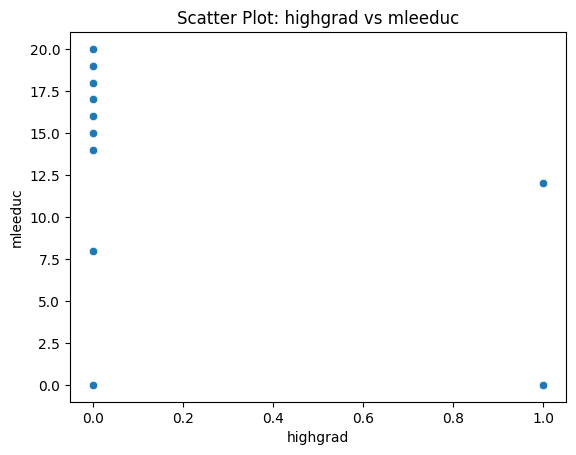

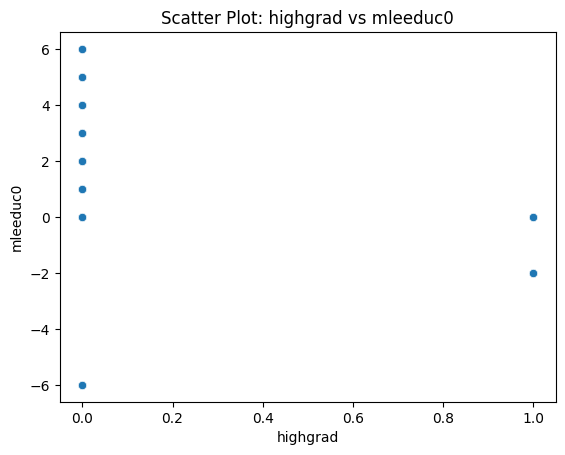

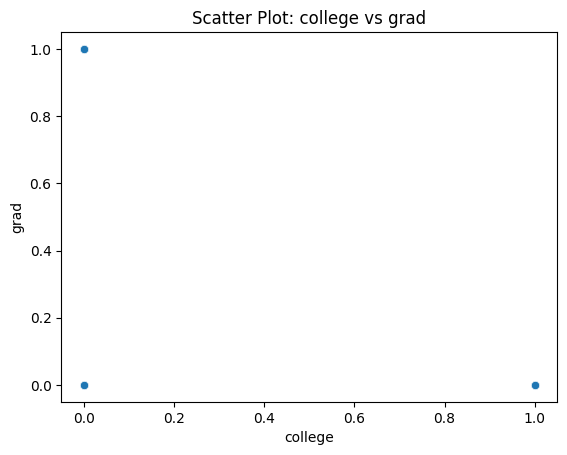

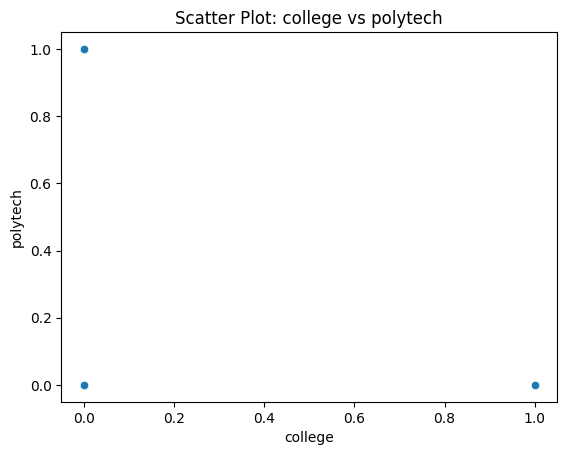

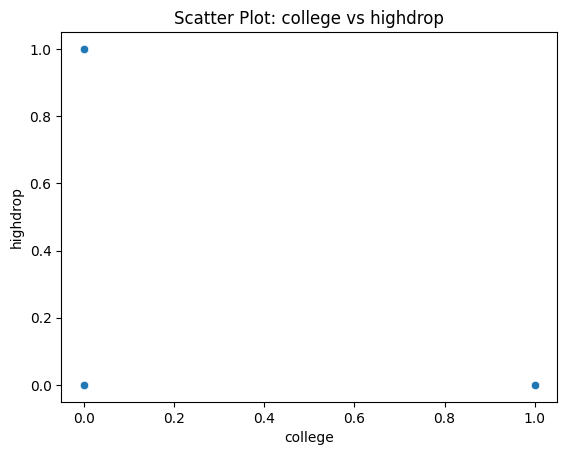

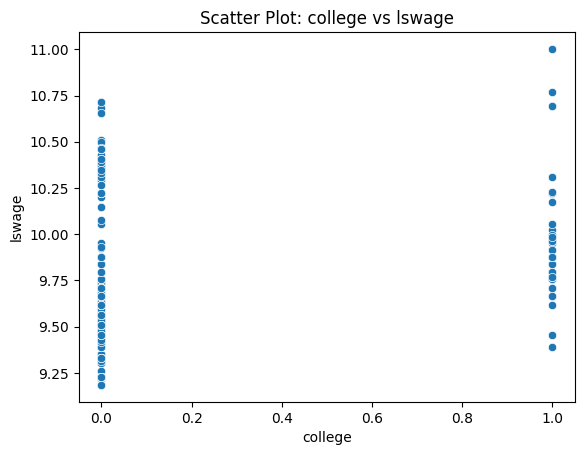

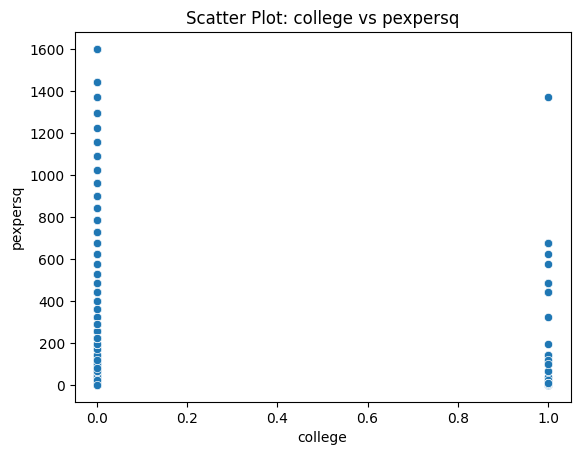

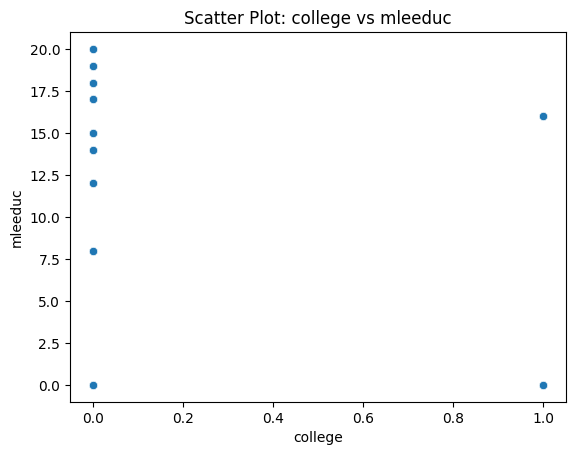

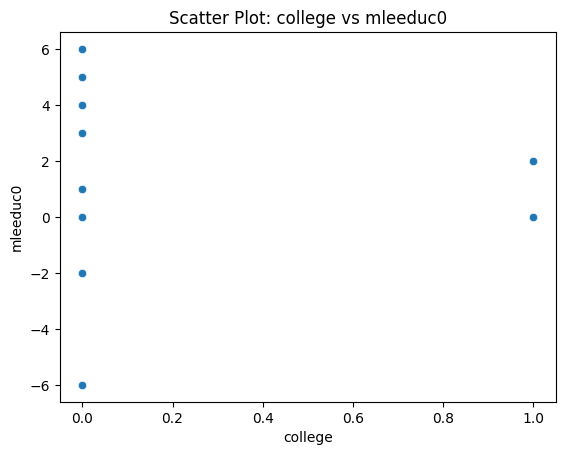

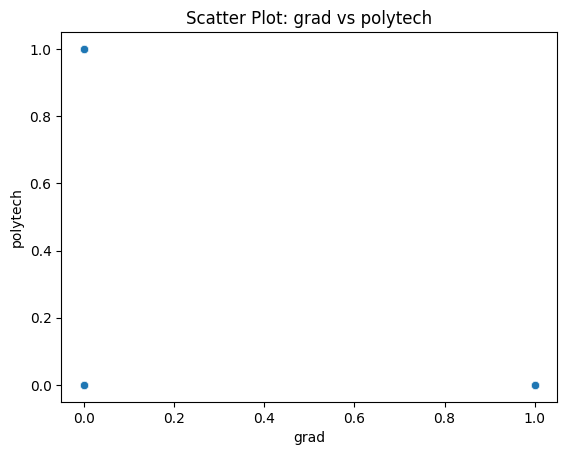

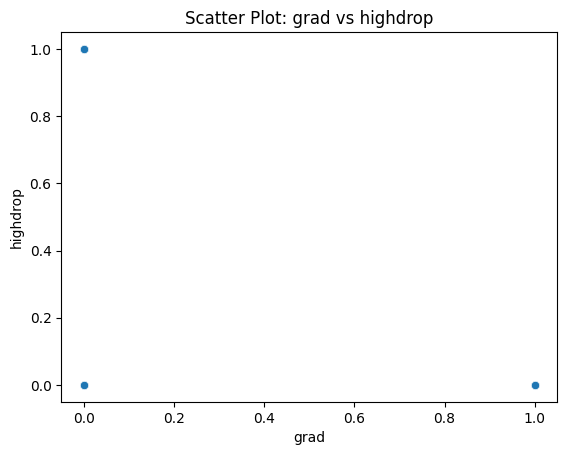

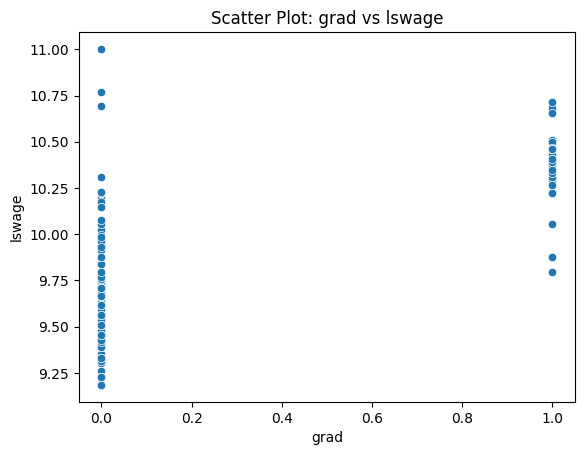

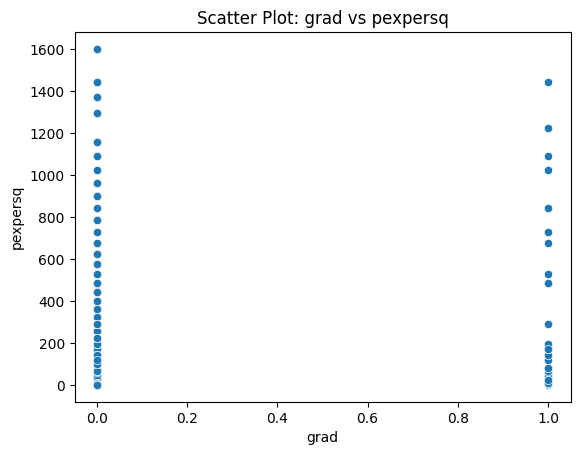

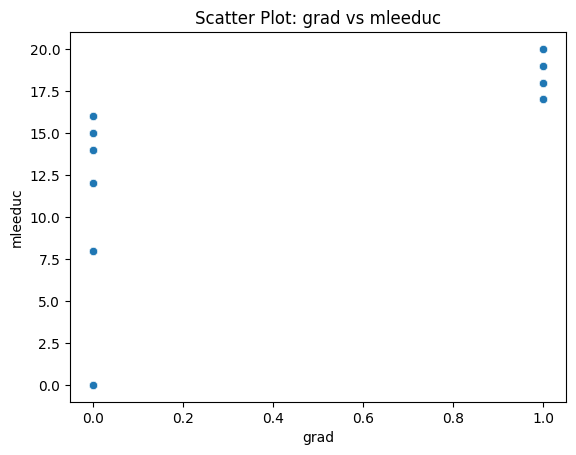

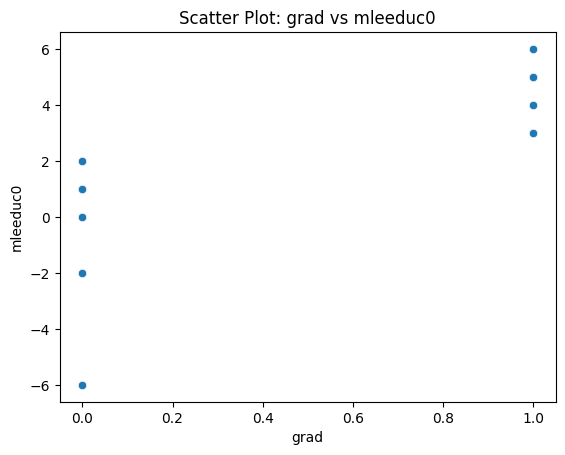

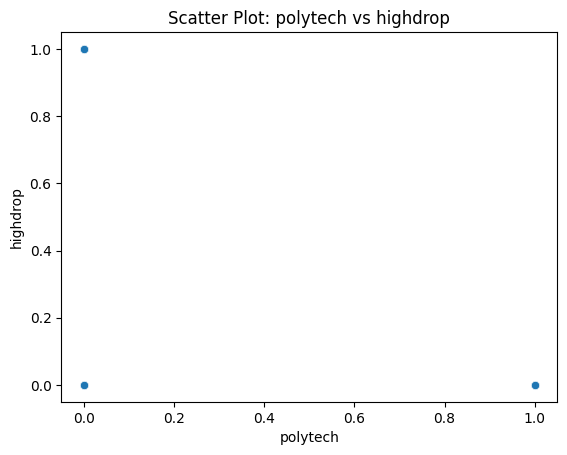

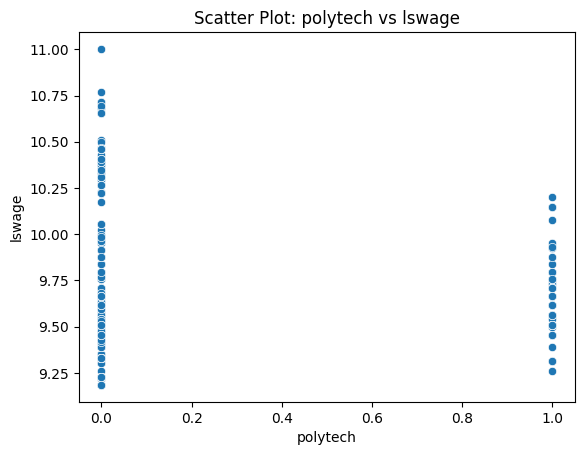

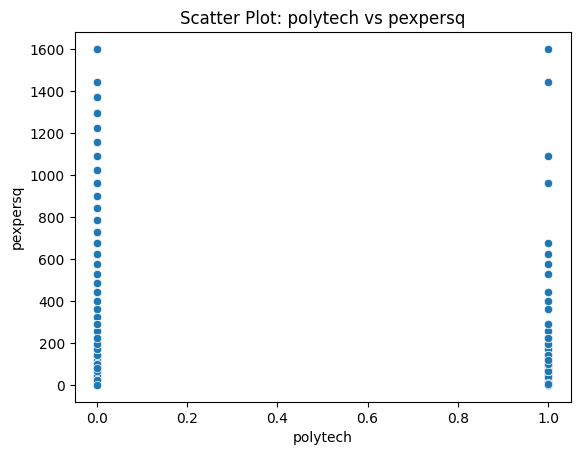

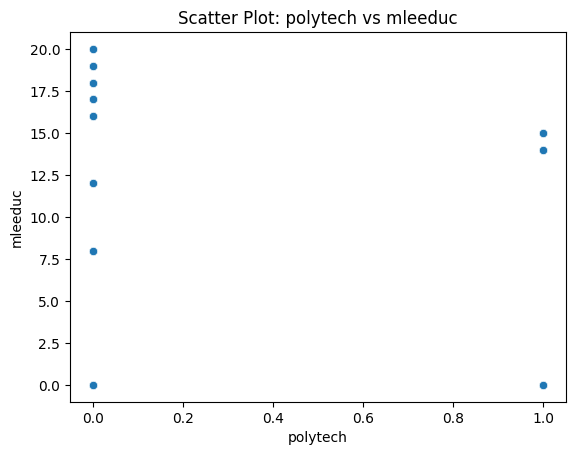

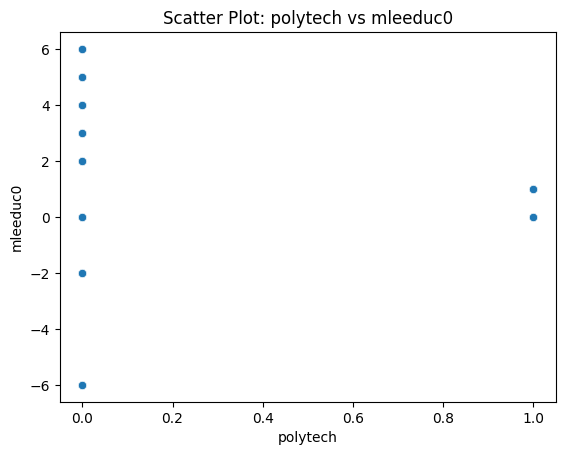

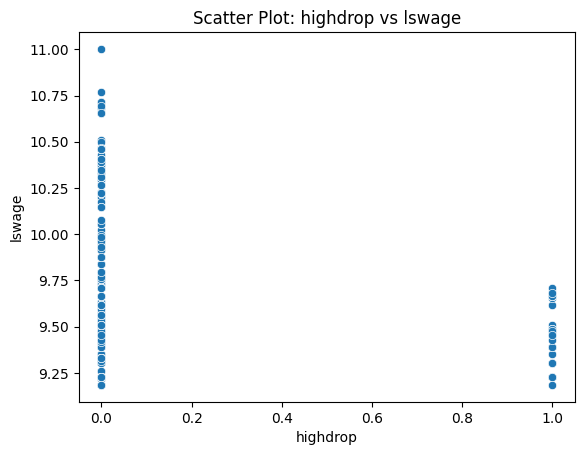

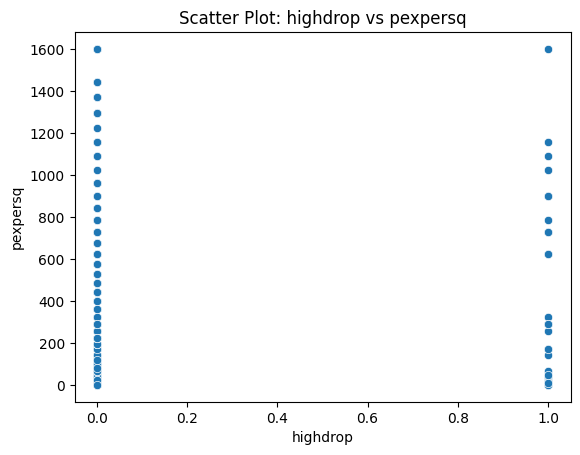

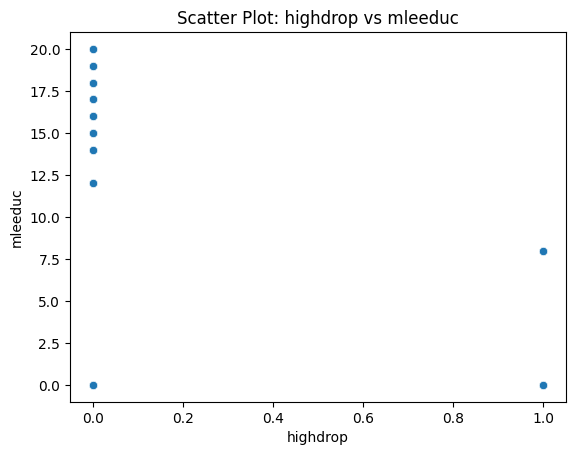

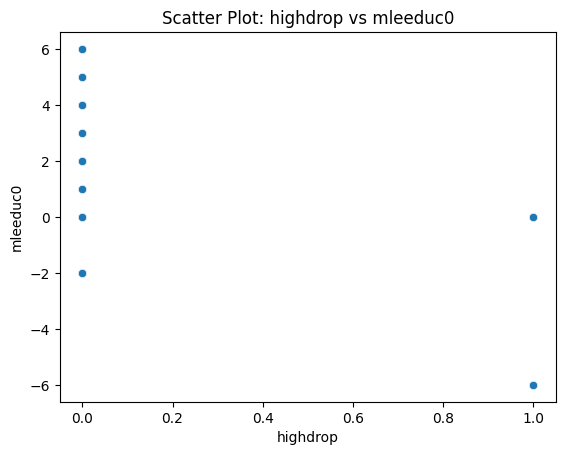

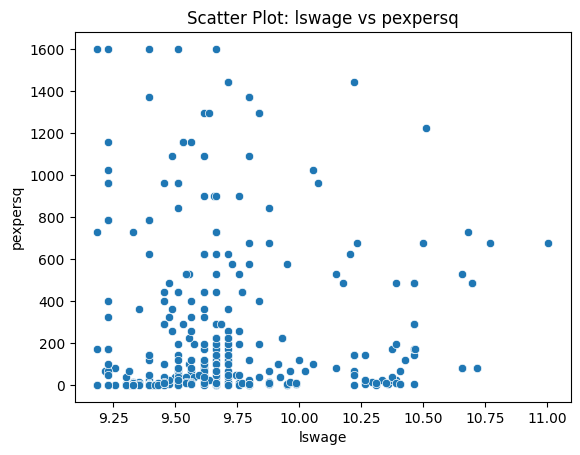

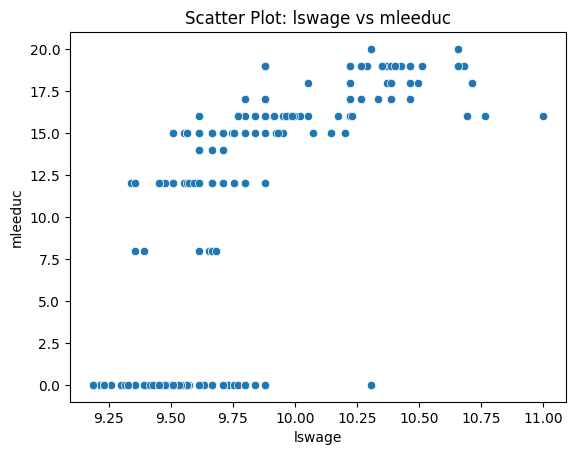

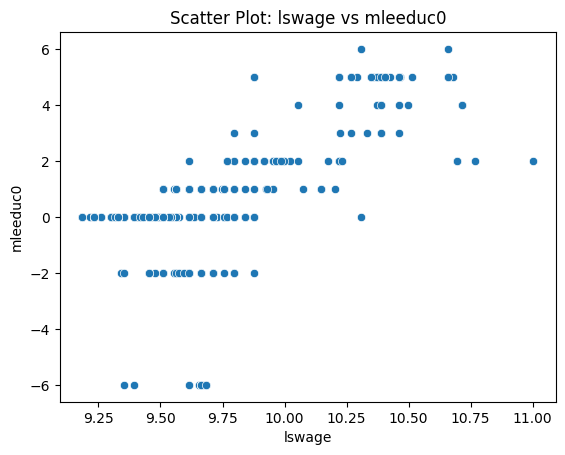

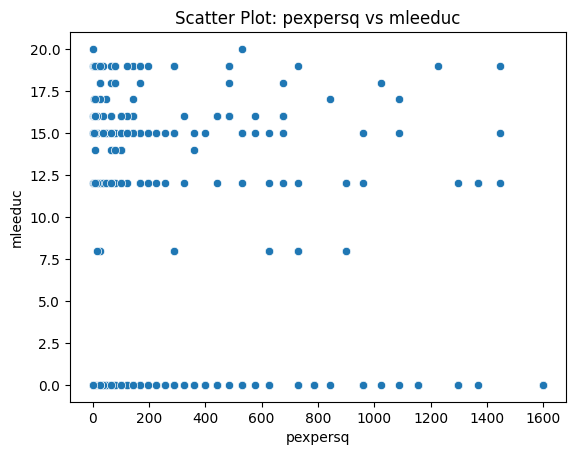

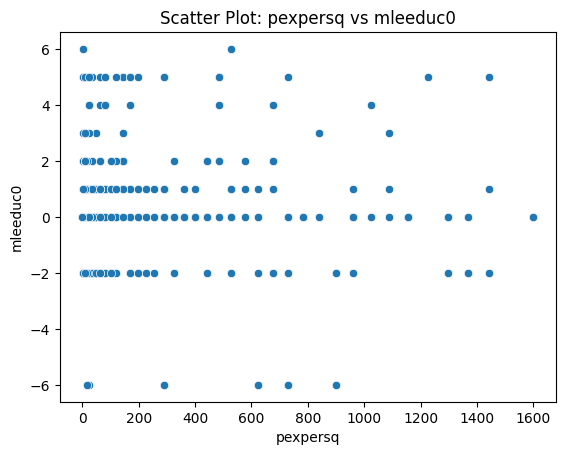

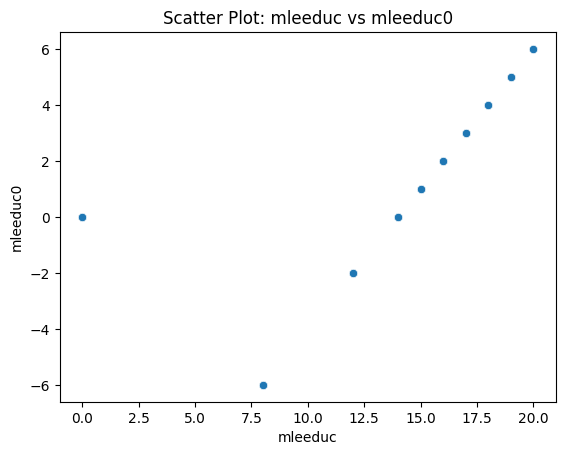

In [9]:
numerical_columns = data.select_dtypes(include='number').columns
for i, col1 in enumerate(numerical_columns):
    for col2 in numerical_columns[i+1:]:
        plt.figure()
        sns.scatterplot(x=data[col1], y=data[col2])
        plt.title(f'Scatter Plot: {col1} vs {col2}')
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.show()

# Correlation matrix and heatmap

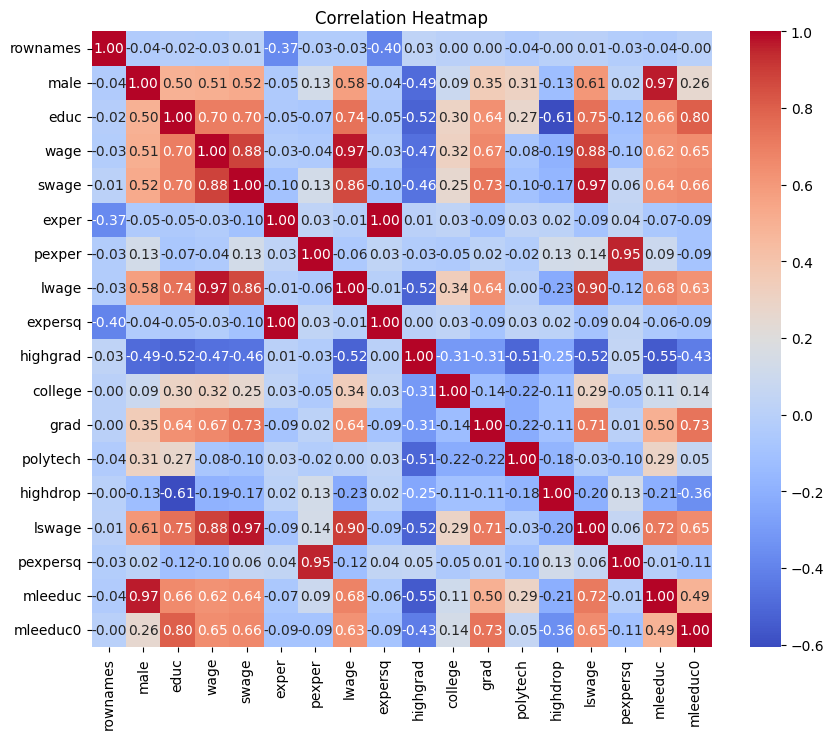

In [10]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Multivariate Analysis
# Pairplot for the dataset

In [11]:
categorical_columns = data.select_dtypes(include='object').columns
for cat_col in categorical_columns:
    for num_col in numerical_columns:
        plt.figure()
        sns.boxplot(x=data[cat_col], y=data[num_col])
        plt.title(f'Boxplot: {num_col} by {cat_col}')
        plt.xlabel(cat_col)
        plt.ylabel(num_col)
        plt.show()

# Multivariate Analysis with regression plots

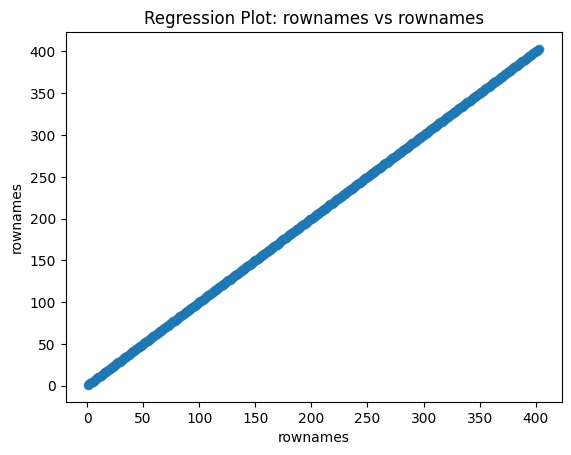

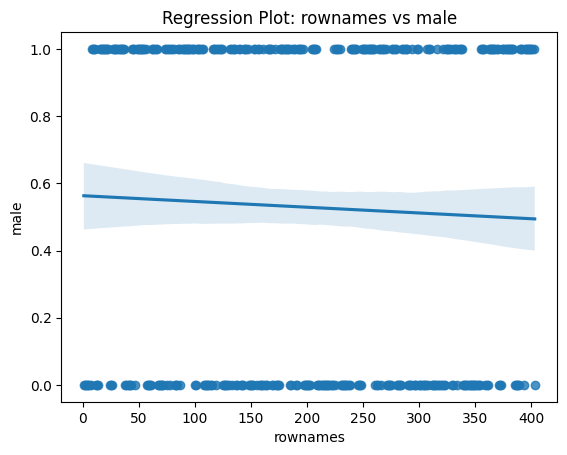

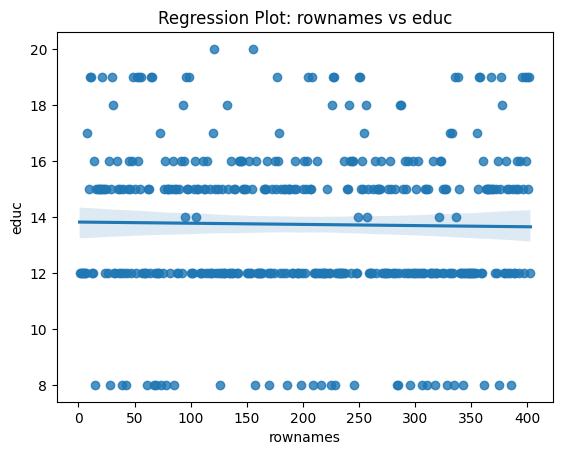

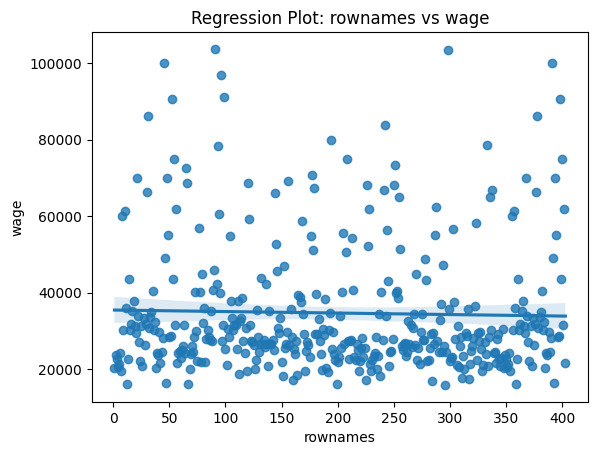

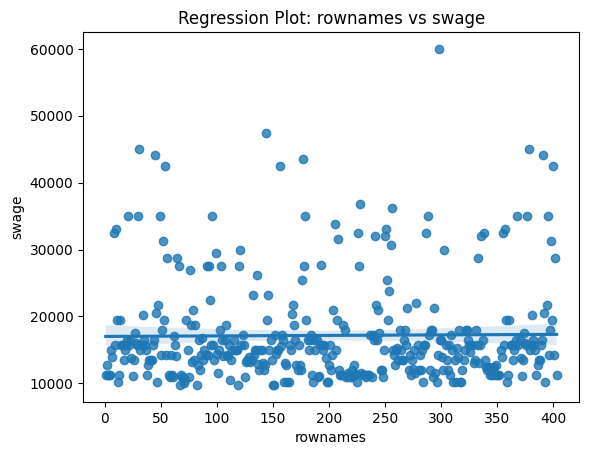

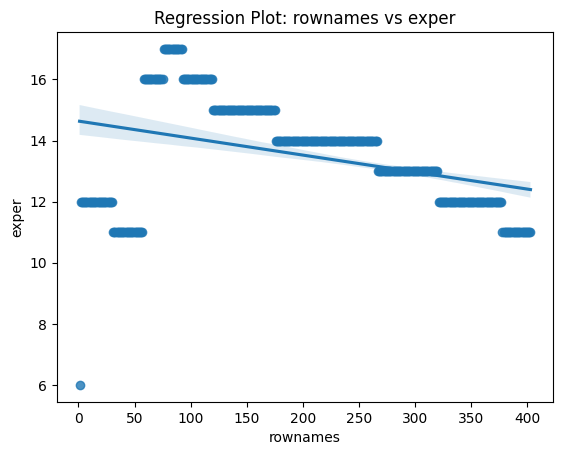

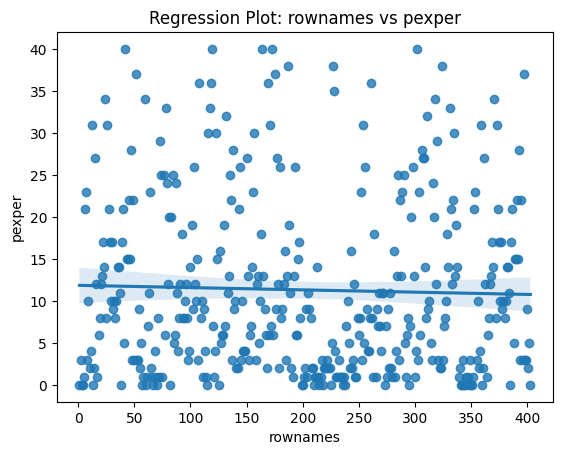

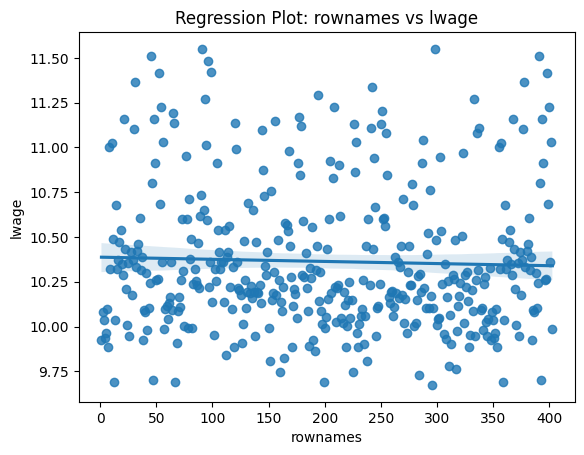

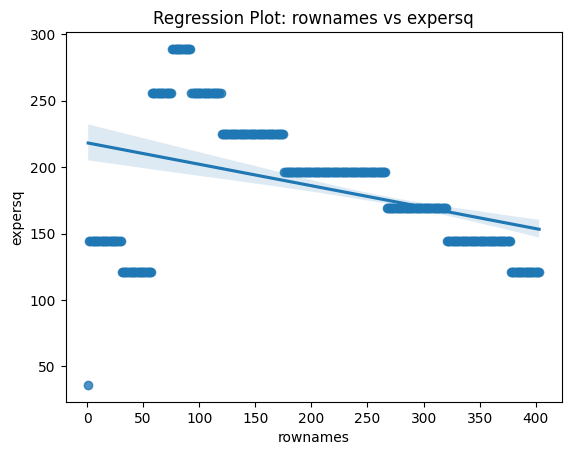

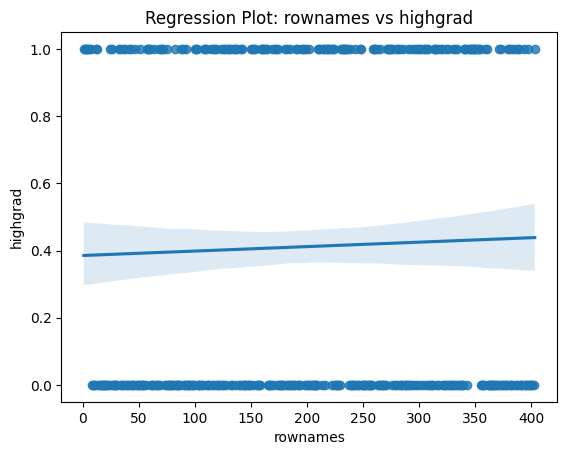

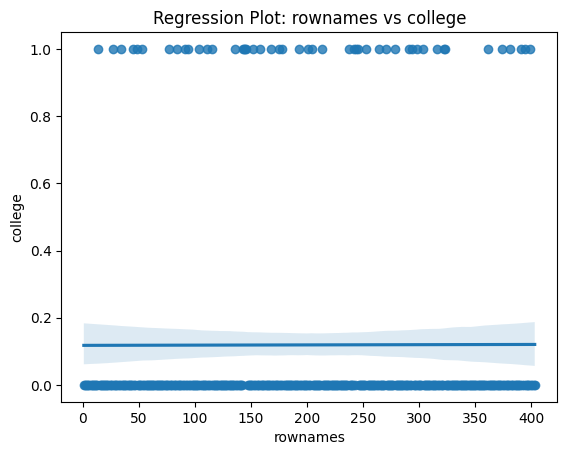

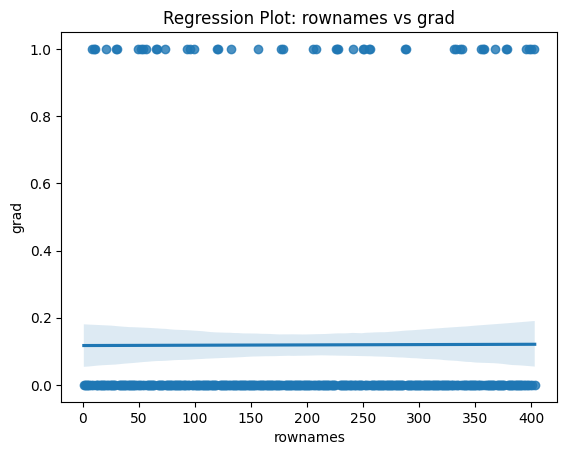

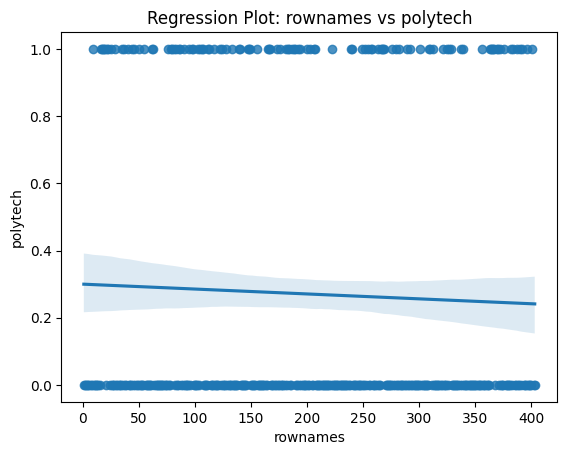

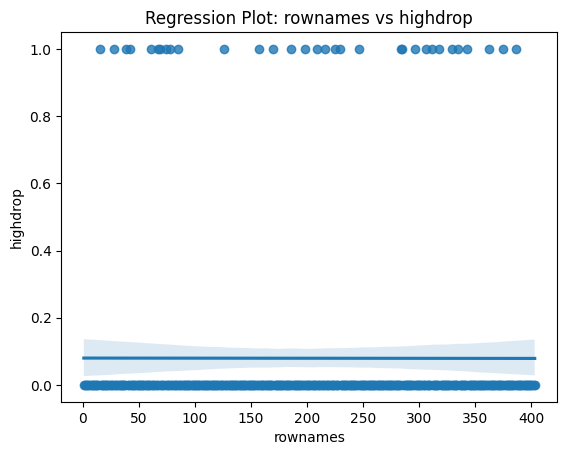

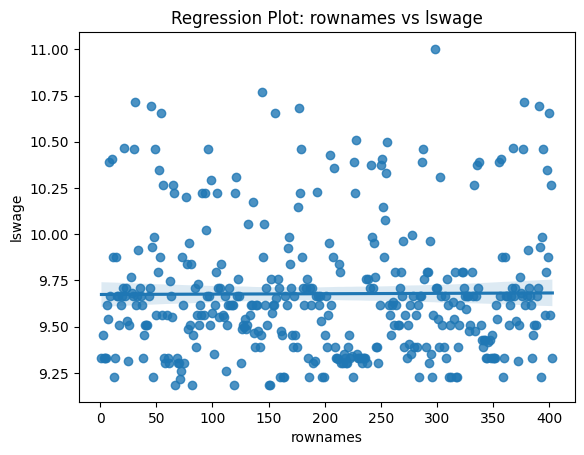

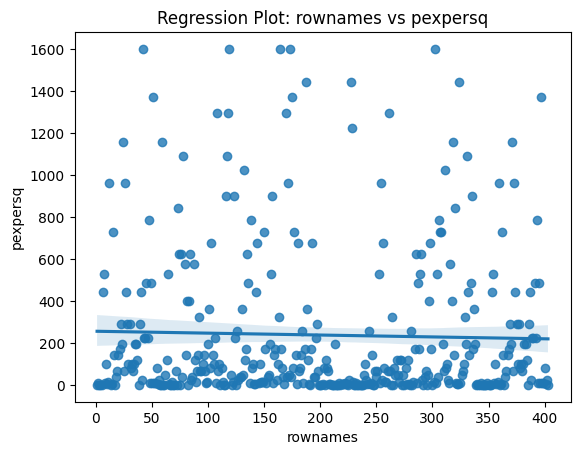

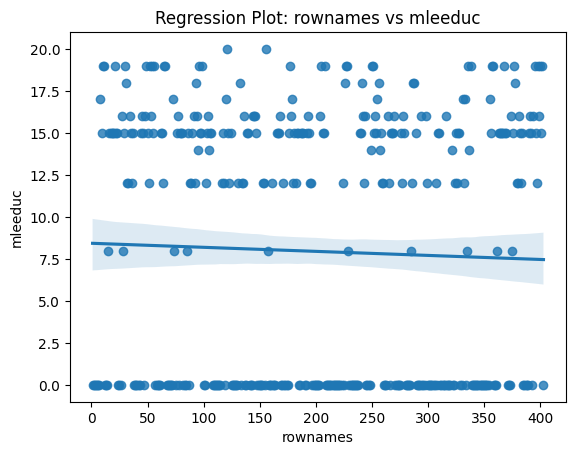

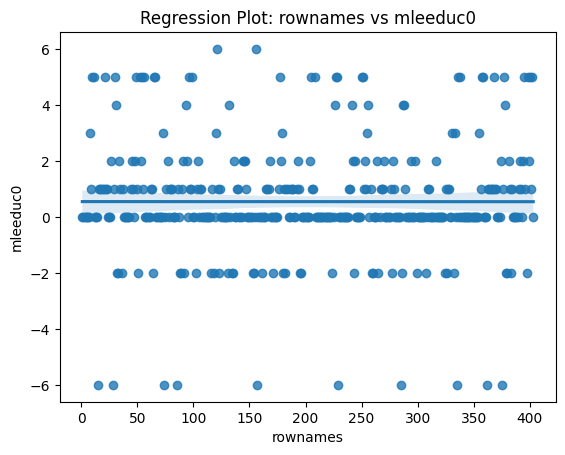

In [12]:
for col in numerical_columns:
    plt.figure()
    sns.regplot(x=data[numerical_columns[0]], y=col, data=data)
    plt.title(f'Regression Plot: {numerical_columns[0]} vs {col}')
    plt.xlabel(numerical_columns[0])
    plt.ylabel(col)
    plt.show()

# Save the cleaned data

In [13]:
data.to_csv('cleaned_engine.csv', index=False)
print("Cleaned data saved to 'cleaned_engine.csv'")

Cleaned data saved to 'cleaned_engine.csv'
